Сложные сети и их приложения

группа 22-М02-пу

Рудакова София Святославовна

2023

# **Сложные сети. Практика. **

Библиотека для работы с графами [NetworkX](https://networkx.org/documentation/stable/)

In [38]:
# Импортируем библиотеку для работы с графами и не только
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from scipy.integrate import odeint

In [2]:
# для импорта датасетов из папки на Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Задание 1.


1.   Создайте неориентированный граф с множеством вершин $V = \{a, b, c, d, e\}$ и множеством рёбер $E = \{(a,b),  (a,d), (b,c), (c,a), (c,e), (d,c)\}$.
  * Нарисуйте созданный граф;
  * Добавьте в граф вершину $f$, а затем соедините её с вершинами $a$ и $d$;
  * Удалите из графа ребро $(a,d)$;
  * Нарисуйте измененный граф;
  * Выведите список вершин, смежных вершине $a$; вершине $c$.
  * Выведите список ребер графа.

2. Выведите матрицу смежности графа из п.1.  Измените матрицу смежности так, что граф, созданный по новой матрице был ориентированным. Создайте такой граф и нарисуйте его.

2.  Создайте ориентированный граф с множеством вершин $V = \{a, b, c, d, e\}$ и множеством рёбер $E = \{(a,b),  (b,c), (c,a), (c,e), (d,c)\}$. Для создания используйте список смежности.
  * Выведите список вершин, смежных вершине $a$; вершине $c$;
  * Добавьте в граф рёбра так, чтобы в новом графе было две компоненты сильной связности; была одна компонента сильной связности.



In [ ]:
# Пустой граф без вершин и узлов

G = nx.Graph()
print(G.is_directed())

False


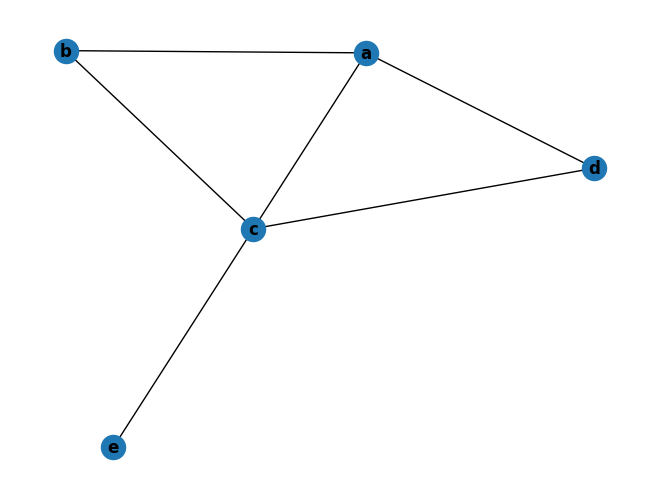

In [ ]:
# Создайте неориентированный граф с множеством вершин  V={a,b,c,d,e}  и множеством рёбер  E={(a,b),(a,d),(b,c),(c,a),(c,e),(d,c)} .
#Нарисуйте созданный граф;
adjacency_dict = {'a': ('b', 'd'), 'b': ('c'), 'c': ('a', 'e'), 'd': ('c')}
#adjacency_dict = {'a:1': ('b:2', 'c:3'), 'b:2': ('a:1', 'c:3'), 'c:3': ('a:1', 'b:2', 'd:4'), 'd:4': 'e:5' }
G = nx.Graph(adjacency_dict)
nx.draw(G, with_labels=True, font_weight='bold')

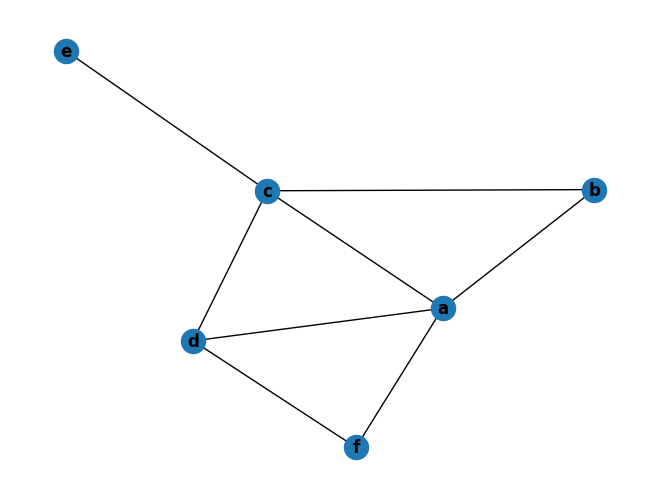

In [ ]:
# Добавьте в граф вершину  f , а затем соедините её с вершинами  a  и  d
G.add_node("f")

G.add_edge("f", "a")
G.add_edge("f", "d")

nx.draw(G, with_labels=True, font_weight='bold')


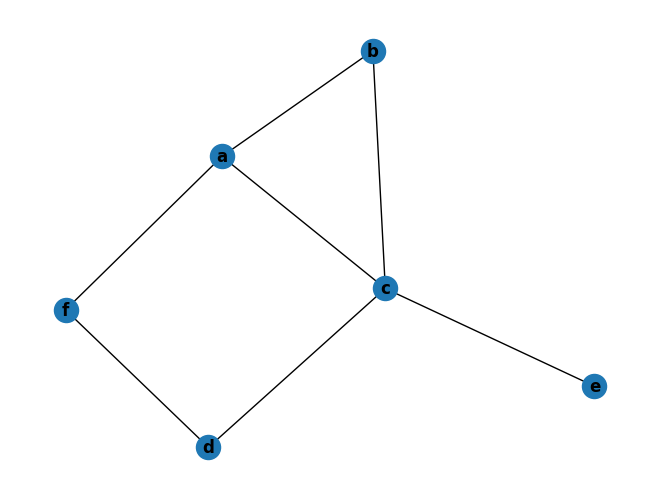

In [ ]:
#№№№№№Удалите из графа ребро  (a,d) ;
G.remove_edge("a", "d")
nx.draw(G, with_labels=True, font_weight='bold')


In [ ]:
# список вершин, cмежных вершине  a,c
adj_list = list(G.adj['a'])
print('Cписок вершин, cмежных с вершиной a:', adj_list)
adj_list = list(G.adj['c'])
print('Cписок вершин, cмежных с вершиной c:', adj_list)

Cписок вершин, cмежных с вершиной a: ['b', 'c', 'f']
Cписок вершин, cмежных с вершиной c: ['b', 'a', 'e', 'd']


In [ ]:
# список ребер графа
edg_list = list(G.edges)
print('Список ребер графа:', edg_list)

Список ребер графа: [('a', 'b'), ('a', 'c'), ('a', 'f'), ('b', 'c'), ('c', 'e'), ('c', 'd'), ('d', 'f')]


In [ ]:
# Матрица смежности графа(симметричны относительно главной диагонали)
GG = nx.adjacency_matrix(G)

print(GG.toarray())

[[0 1 1 0 0 1]
 [1 0 1 0 0 0]
 [1 1 0 1 1 0]
 [0 0 1 0 0 1]
 [0 0 1 0 0 0]
 [1 0 0 1 0 0]]


In [ ]:
# Матрица смежности графа в ориентироанном графе (несеммитрична)
#№№берем 1 элмент и меняем го ( допустим 0 на 1)
# создание графа из матрицы смежности
A = np.array([[0, 0, 1, 0, 0, 1],
              [1, 0, 1, 0, 0, 1],
              [1, 0, 0, 1, 1, 1],
              [0, 0, 1, 0, 0, 1],
              [0, 0, 1, 1, 0, 0],
              [0, 0, 0, 1, 1, 0]])

GA = nx.from_numpy_array(A, create_using=nx.DiGraph)

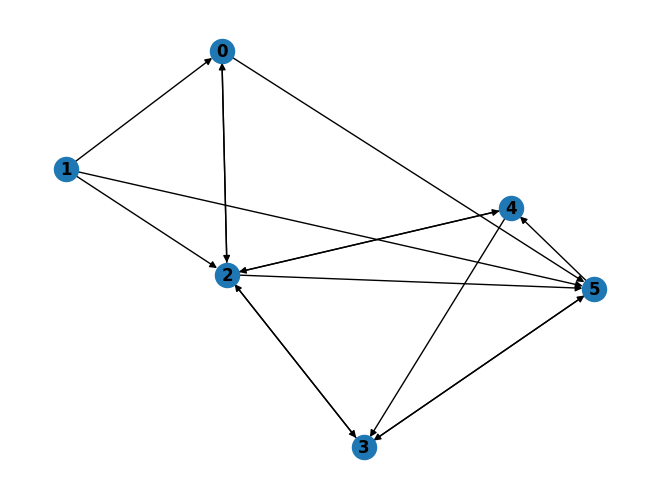

In [ ]:
nx.draw(GA, with_labels=True, font_weight='bold')

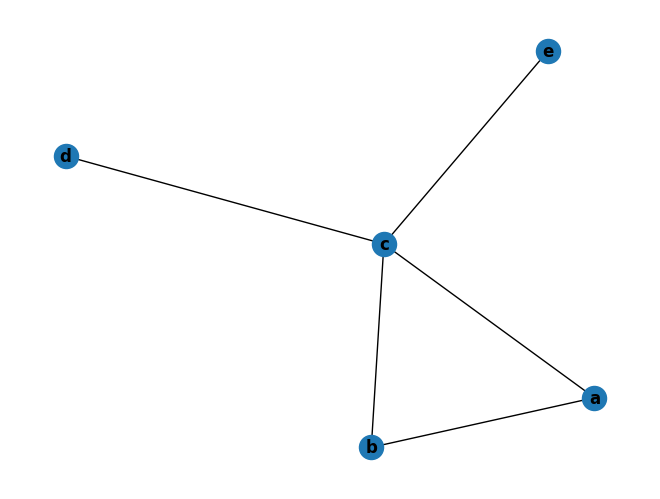

In [ ]:
# Добавление 5 вершин
adjacency_dict = {'a': ('b'), 'b': ('c'), 'c': ('a', 'e'), 'd': ('c')}
#adjacency_dict = {'a:1': ('b:2', 'c:3'), 'b:2': ('a:1', 'c:3'), 'c:3': ('a:1', 'b:2', 'd:4'), 'd:4': 'e:5' }
G = nx.Graph(adjacency_dict)
nx.draw(G, with_labels=True, font_weight='bold')

In [ ]:
# список вершин, cмежных a,c
adj_list = list(G.adj['a'])
print('Cписок вершин, cмежных с вершиной a:', adj_list)
adj_list = list(G.adj['c'])
print('Cписок вершин, cмежных с вершиной c:', adj_list)

Cписок вершин, cмежных с вершиной a: ['b', 'c']
Cписок вершин, cмежных с вершиной c: ['b', 'a', 'e', 'd']


1

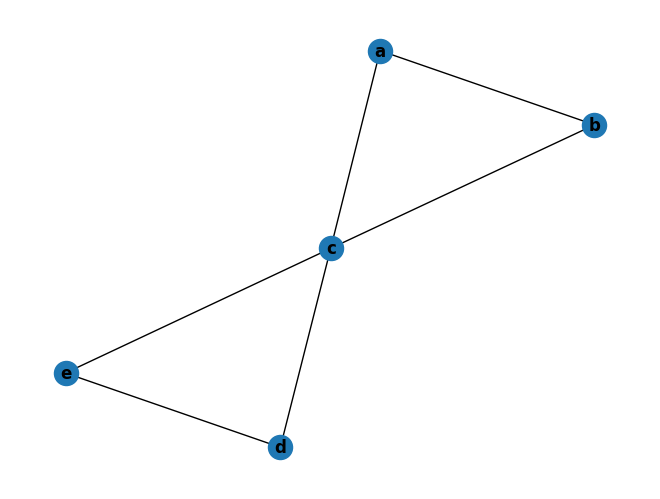

In [ ]:
adjacency_dict = {'a': ('b'), 'b': ('c'), 'c': ('a', 'e'), 'd': ('c'), 'e': ('d')}
G = nx.Graph(adjacency_dict)
nx.draw(G, with_labels=True, font_weight='bold')
nx.number_connected_components(G) # число компонент связности

2

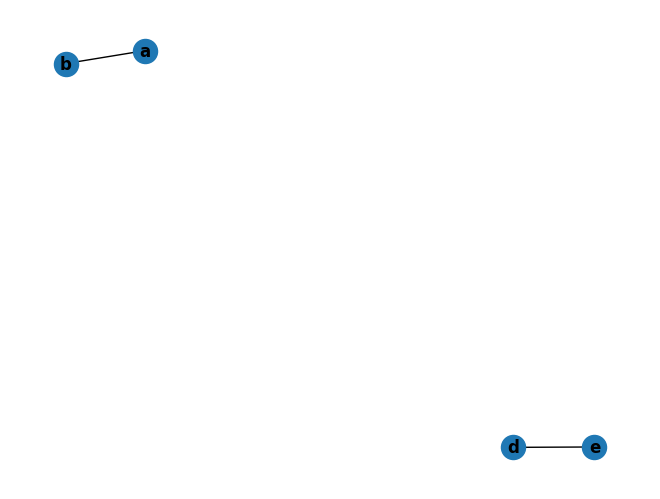

In [ ]:
adjacency_dict = {'a': ('b'), 'b': (), 'd': (), 'e': ('d')}
G = nx.Graph(adjacency_dict)
nx.draw(G, with_labels=True, font_weight='bold')
nx.number_connected_components(G) # число компонент связности

# Задание 2.

Для граф из задания 1.1
  * кратчайшие пути от вершины $a$ до всех остальных;
  * длины кратчайших путей между всеми веришнами графа;
  * радиус и диаметр графа.

In [ ]:
# Пустой граф без вершин и узлов

G = nx.Graph()
print(G.is_directed())

False


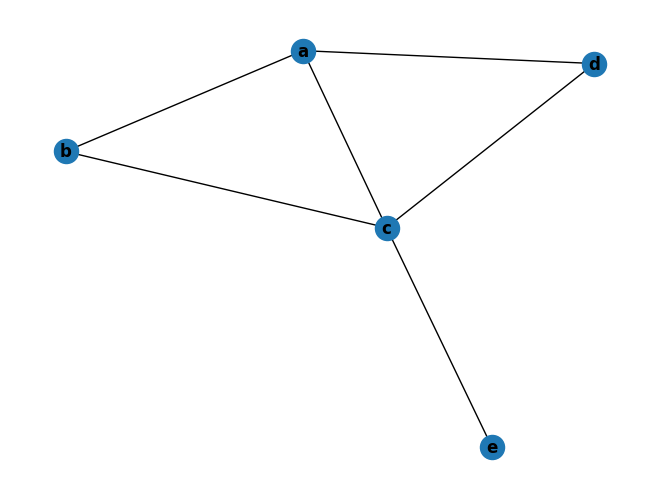

In [ ]:
# Добавление 5 вершин
adjacency_dict = {'a': ('b', 'd'), 'b': ('c'), 'c': ('a', 'e'), 'd': ('c')}
#adjacency_dict = {'a:1': ('b:2', 'c:3'), 'b:2': ('a:1', 'c:3'), 'c:3': ('a:1', 'b:2', 'd:4'), 'd:4': 'e:5' }
G = nx.Graph(adjacency_dict)
nx.draw(G, with_labels=True, font_weight='bold')

In [ ]:
# кратчайшие пути от вершины a до всех остальных
nx.shortest_path(G, source = 'a')

{'a': ['a'],
 'b': ['a', 'b'],
 'd': ['a', 'd'],
 'c': ['a', 'c'],
 'e': ['a', 'c', 'e']}

In [ ]:
# всевозможные кратчайшие пути
sp = nx.shortest_path(G)
sp

{'a': {'a': ['a'],
  'b': ['a', 'b'],
  'd': ['a', 'd'],
  'c': ['a', 'c'],
  'e': ['a', 'c', 'e']},
 'b': {'b': ['b'],
  'a': ['b', 'a'],
  'c': ['b', 'c'],
  'd': ['b', 'a', 'd'],
  'e': ['b', 'c', 'e']},
 'c': {'c': ['c'],
  'b': ['c', 'b'],
  'a': ['c', 'a'],
  'e': ['c', 'e'],
  'd': ['c', 'd']},
 'd': {'d': ['d'],
  'a': ['d', 'a'],
  'c': ['d', 'c'],
  'b': ['d', 'a', 'b'],
  'e': ['d', 'c', 'e']},
 'e': {'e': ['e'],
  'c': ['e', 'c'],
  'b': ['e', 'c', 'b'],
  'a': ['e', 'c', 'a'],
  'd': ['e', 'c', 'd']}}

In [ ]:
# радиус и диаметр графа
got_rad = nx.radius(G)

got_diam = nx.diameter(G)

print(f'Радиус графа: {got_rad}', f'Диаметр графа: {got_diam}', sep='\n')

Радиус графа: 1
Диаметр графа: 2


Задание 2


**A. Свойства случайного графа $G(n, p)$**
1. Создайте граф по модели $G(n, p)$ на $100$ вершинах. Как изменяется граф при изменении параметра $p = 10^{-3}, 10^{-2}, 10^{-2}, 2\cdot 10^{-2}, 10^{-1} $?

2. Вычислите среднюю степень вершины и мат. ожидания числа рёбер в графе $G(100, 0.02)$ на основе 10 испытаний. Сравните полученные значения с аналитическими.
2. Создайте граф по модели $G(n, p)$ на $1000$ вершинах. Выберите значения $p$ так, чтобы средняя степень вершины $\left\langle k \right\rangle$ была
  * $\left\langle k \right\rangle < 1$;
  * $\left\langle k \right\rangle = 1$;
  * $\left\langle k \right\rangle > 1$;
  * $\left\langle k \right\rangle \gg \ln n$.

  Как меняется число вершин в наибольшей компоненте связности при изменении $p$?

3. Создайте граф $G(n,p)$ с $n = 10^2, 10^3, 10^4$ узлами и средней степенью вершины $\left\langle k \right\rangle = 50$. Как распределены степени узлов в графах?

4. Вычислите диаметр и среднюю длину пути для случайных графов из п. 2 (случай $\left\langle k \right\rangle \gg 1$) и п. 3. Как соотносятся найденные величины с числом узлов в сети?

5. Для графов из п. 3 вычислите средний кластерный коэффициент. Как изменяется средний кластерный коэффициент с ростом числа узлов?

6. Какие свойства реальных сетей и модели $G(n,p)$ совпадают? Какие есть недостатки у модели $G(n,p)$ ?

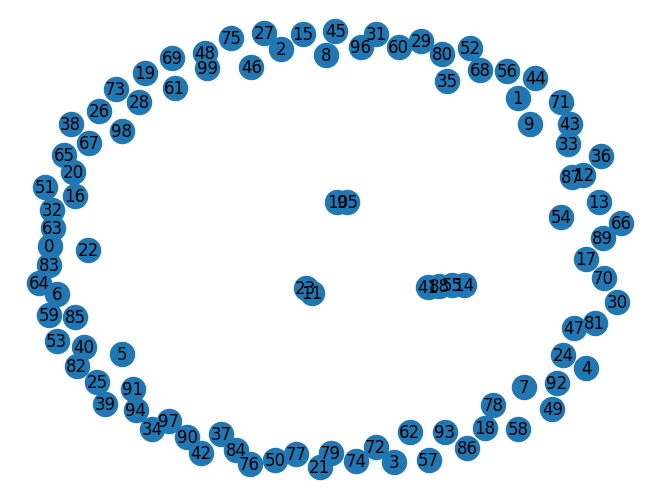

In [ ]:
# граф G(n, m)
G_nm= nx.fast_gnp_random_graph(100, 1/1000)
nx.draw(G_nm, with_labels = True)

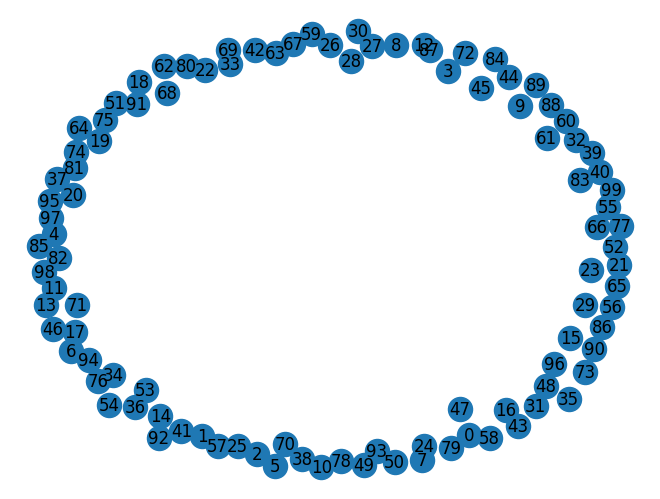

In [ ]:
# граф G(n, m)
G = nx.fast_gnp_random_graph(100, 1/100)
nx.draw(G_nm, with_labels = True)

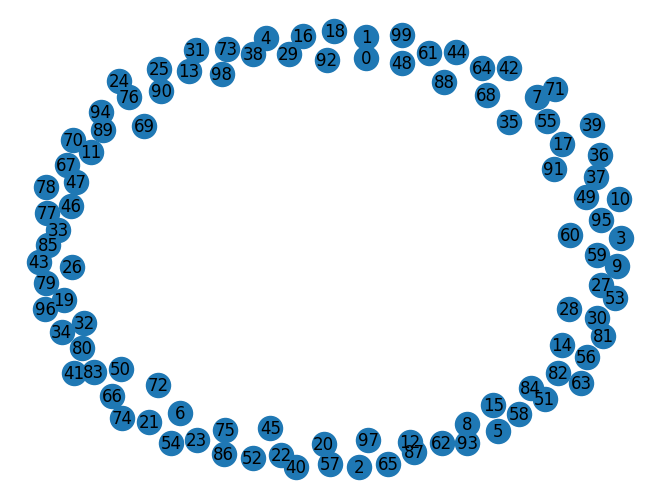

In [ ]:
# граф G(n, m)
G = nx.fast_gnp_random_graph(100,2*1/100)
nx.draw(G_nm, with_labels = True)

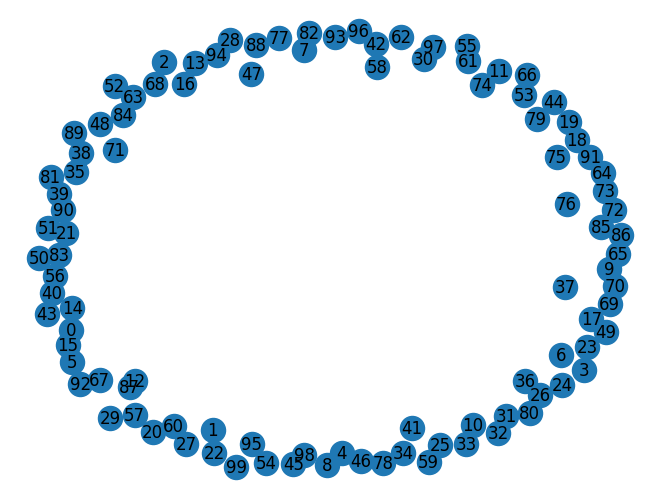

In [ ]:
# граф G(n, m)
G = nx.fast_gnp_random_graph(100,1/10)
nx.draw(G_nm, with_labels = True)

Каких-то особых изменений нет,так как степень вероятности выпадания ребра слишком маленькая,но при этом,с увеличением р граф будет становится более плотным и содержать больше ребер

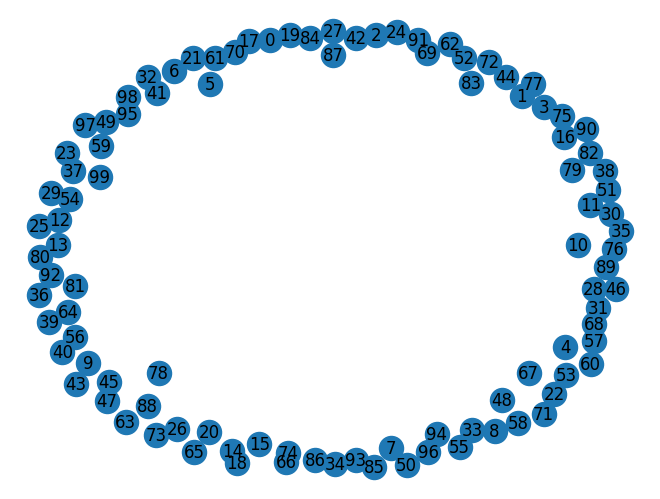

In [ ]:
# граф G(n, m)
G_nm = nx.gnm_random_graph(100, 0.02)
nx.draw(G_nm, with_labels = True)

In [ ]:
print(f'Средняя степень узла: {np.mean(G_nm): .3f}', sep='\n')
math_exp = 0.02 * (100 * (100-1)/2)
print(f'Математическое ожидание: {math_exp}', sep='\n')

Средняя степень узла:  49.500
Математическое ожидание: 99.0


Средняя степень узла: 49.500
Математическое ожидание: 99.0
Средняя степень узла: 49.500
Математическое ожидание: 99.0
Средняя степень узла: 49.500
Математическое ожидание: 99.0
Средняя степень узла: 49.500
Математическое ожидание: 99.0
Средняя степень узла: 49.500
Математическое ожидание: 99.0
Средняя степень узла: 49.500
Математическое ожидание: 99.0
Средняя степень узла: 49.500
Математическое ожидание: 99.0
Средняя степень узла: 49.500
Математическое ожидание: 99.0
Средняя степень узла: 49.500
Математическое ожидание: 99.0
Средняя степень узла: 49.500
Математическое ожидание: 99.0


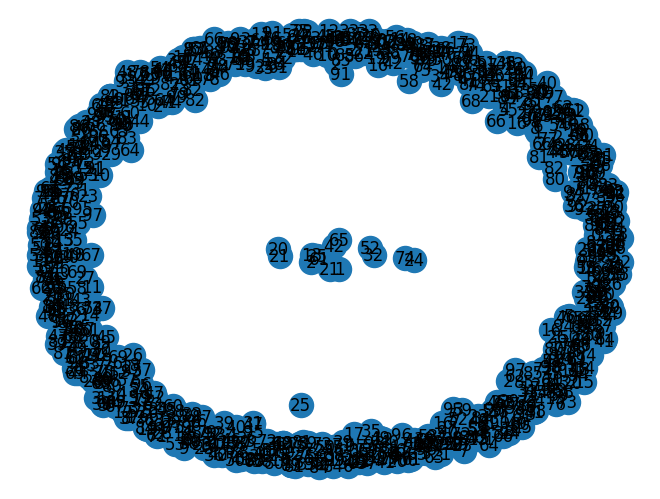

In [ ]:
for _ in range(10):
    # граф G(n, m)
    G_nm = nx.gnm_random_graph(100, 0.02)
    nx.draw(G_nm, with_labels=True)
    print(f'Средняя степень узла: {np.mean(G_nm):.3f}', sep='\n')
    math_exp = 0.02 * (100 * (100-1)/2)
    print(f'Математическое ожидание: {math_exp}', sep='\n')


0.999


0.0

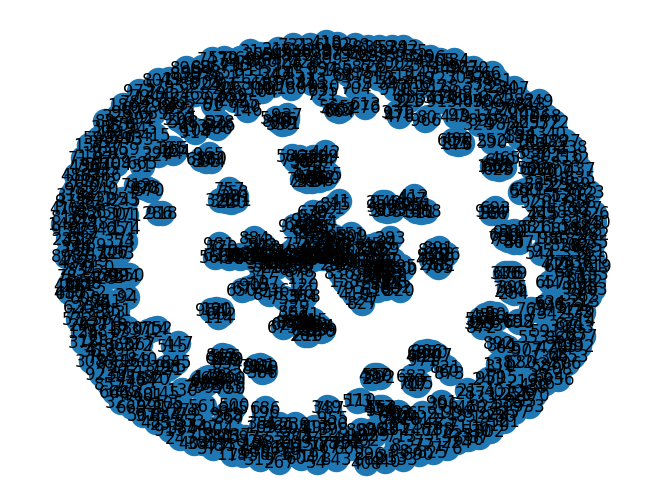

In [ ]:
# граф G(n, p)
G_np = nx.gnp_random_graph(1000, 0.001)
nx.draw(G_np, with_labels = True)
k=0.001*(1000-1)
print(k)
# средний кластерный коэффициент
nx.average_clustering(G_np)

1.0


0.002333333333333333

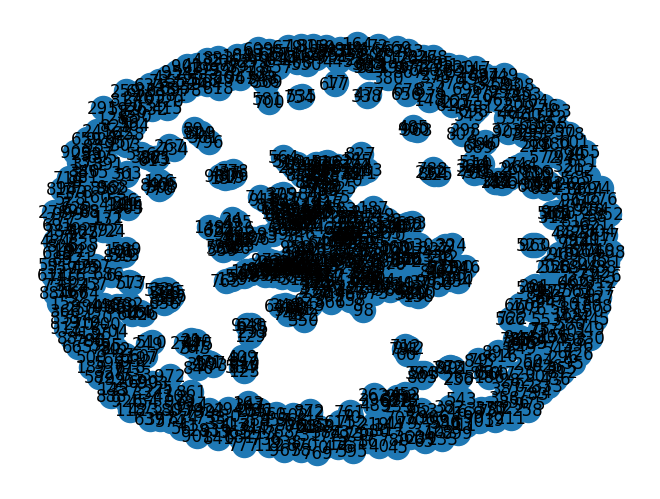

In [ ]:
# граф G(n, p)
G_np = nx.gnp_random_graph(1000, 1/999)
nx.draw(G_np, with_labels = True)
k=1/999*(1000-1)
print(k)
# средний кластерный коэффициент
nx.average_clustering(G_np)

2.0


0.00028095238095238097

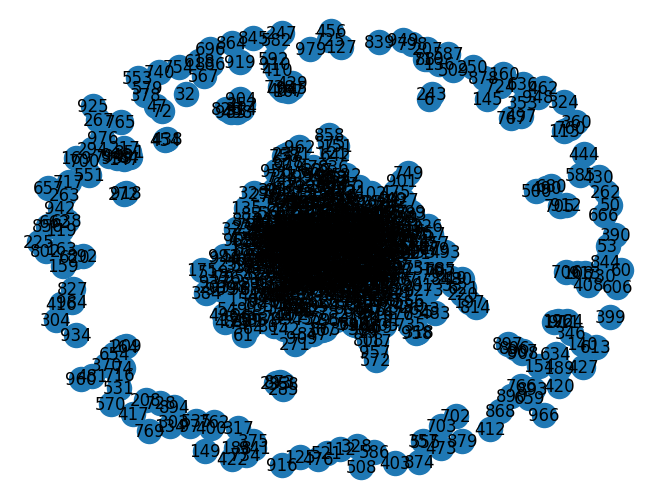

In [ ]:
# граф G(n, p)
G_np = nx.gnp_random_graph(1000, 2/999)
nx.draw(G_np, with_labels = True)
k=2/999*(1000-1)
print(k)
# средний кластерный коэффициент
nx.average_clustering(G_np)

6.907755278982137
9.0


0.008280182803093023

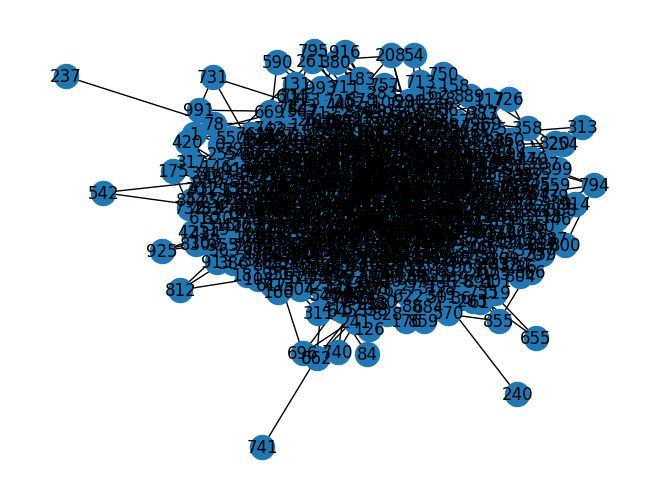

In [ ]:
# граф G(n, p)
G_np = nx.gnp_random_graph(1000, 9/999)
nx.draw(G_np, with_labels = True)
lnn=math.log(1000)
print(lnn)
k=9/999*(1000-1)
print(k)
# средний кластерный коэффициент
nx.average_clustering(G_np)

**Как меняется число вершин в наибольшей компоненте связности при изменении  p?**

 Число вершин увеличивается с возрастанием вероятности

50.094


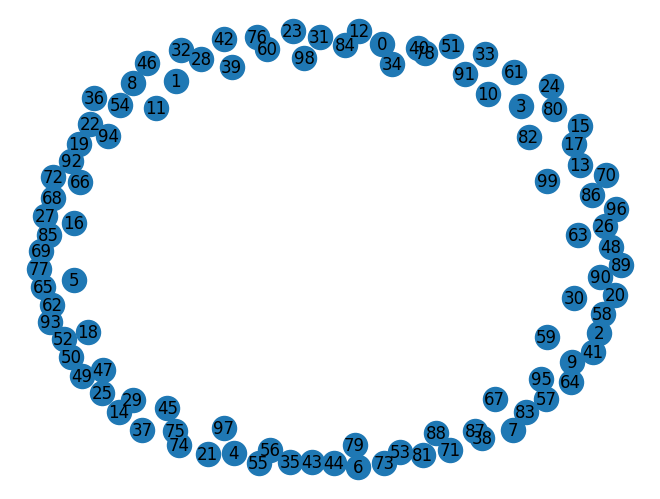

In [ ]:
# граф G(n, p)
G_nm = nx.gnm_random_graph(100, 50.6/100)
nx.draw(G_nm, with_labels = True)
k=50.6/100*(100-1)
print(k)

50.00994


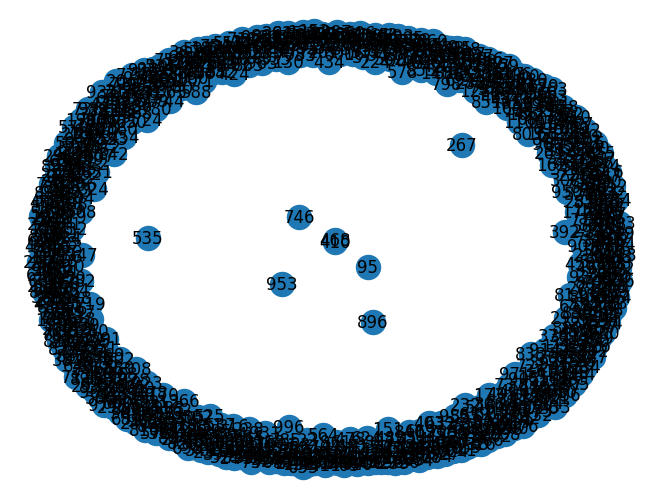

In [ ]:
# граф G(n, p)
G_nm = nx.gnm_random_graph(1000, 50.06/1000)
nx.draw(G_nm, with_labels = True)
k=50.06/1000*(1000-1)
print(k)

50.044995


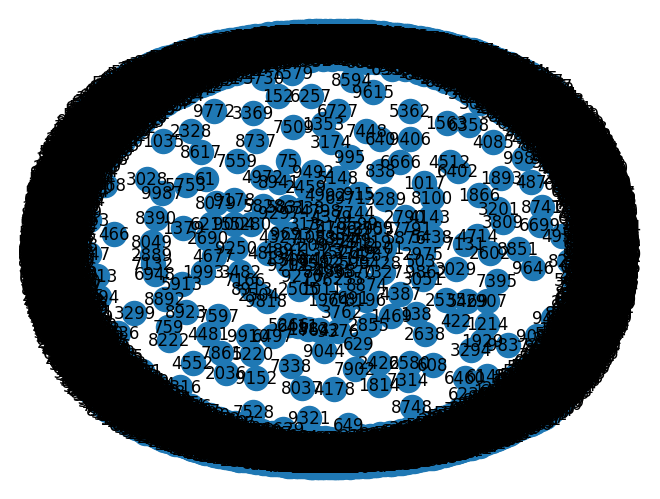

In [ ]:
# граф G(n, p)
G_nm = nx.gnm_random_graph(10000, 50.05/10000)
nx.draw(G_nm, with_labels = True)
k=50.05/10000*(10000-1)
print(k)

**Как меняется число вершин в наибольшей компоненте связности при изменении  p?**


Оно возрастает

**Для графов из п. 3 вычислите средний кластерный коэффициент. Как изменяется средний кластерный коэффициент с ростом числа узлов?**

Он растет с ростом числа узлов

In [ ]:
G = nx.erdos_renyi_graph(100, 0.2)

# Проверяем, является ли граф связным
if nx.is_connected(G):
    # Находим диаметр графа
    diameter = nx.diameter(G)
    print("Диаметр графа:", diameter)

    # Находим среднюю длину пути в графе
    avg_path_length = nx.average_shortest_path_length(G)
    print("Средняя длина пути:", avg_path_length)
else:
    print("Граф не является связным")

Диаметр графа: 3
Средняя длина пути: 1.808888888888889


In [ ]:
G = nx.erdos_renyi_graph(1000, 2/999)

# Проверяем, является ли граф связным
if nx.is_connected(G):
    # Находим диаметр графа
    diameter = nx.diameter(G)
    print("Диаметр графа:", diameter)

    # Находим среднюю длину пути в графе
    avg_path_length = nx.average_shortest_path_length(G)
    print("Средняя длина пути:", avg_path_length)
else:
    print("Граф не является связным")

Граф не является связным


**Какие свойства реальных сетей и модели  G(n,p)  совпадают? Какие есть недостатки у модели  G(n,p)  ?**

Связи формируются случайно(у реальных сетей случайно, у модели с помощью теории вероятности)
Некоторые узлы имеют больше связей чем другие.

**Недостатки**

Не учитывает психологию( т.е. допустим предпочтительность при выборе общения)
Модель статична, когда в реальном времени постоянно меняется
Мало параметров(количество узло  и вероятность)что уменьшает шанс реально хорошего моделирования,и приводит к нереалистичным результатам

Задание 3

**Б. Свойства графа по модели WS (малого мира)**
1. Создайте регулярную круговую решетку с $N = 1000$ узлами и степенью вершины $k = 10$. Вычислите средний кластерный коэффициент, диаметр сети и средний диаметр (среднее расстояние между парами вершин).

2. Создайте граф по модели малого мира с $N = 1000$ узлами и числом соседей в начальный момент $k = 10$. Как будет меняться средний кластерный коэффициент и средний диаметр при увеличении вероятности пересоединения ребра $p$ ? Постойте графики, аналогичные графику из статьи Watts и Strogats

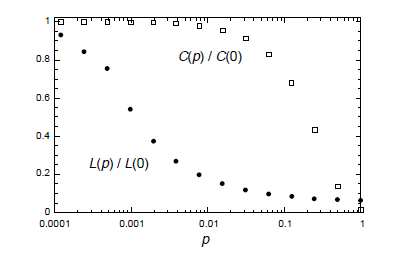

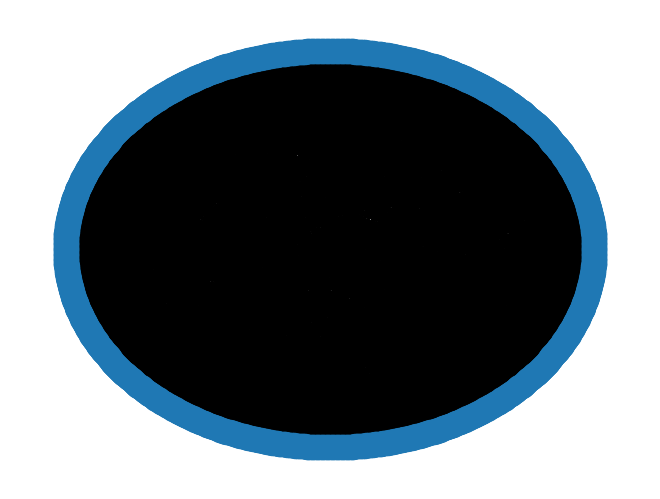

In [ ]:
graph_1 = nx.random_regular_graph(10, 1000)
nx.draw(graph_1, nx.circular_layout(graph_1))

In [ ]:
 #Вычислите средний кластерный коэффициент, диаметр сети и средний диаметр (среднее расстояние между парами вершин).

cluster_coefficient = nx.average_clustering(graph_1)


diameter = nx.diameter(graph_1)


average_diameter = nx.average_shortest_path_length(graph_1)




print("Средний кластерный коэффициент:",cluster_coefficient)
print("Диаметр сети:", diameter)
print("Средний диаметр:", average_diameter )

Средний кластерный коэффициент: 0.0071333333333333145
Диаметр сети: 5
Средний диаметр: 3.2904464464464462


Средний кластерный коэффициент: 0.4789383838383835
Средний диаметр: 4.358012012012012


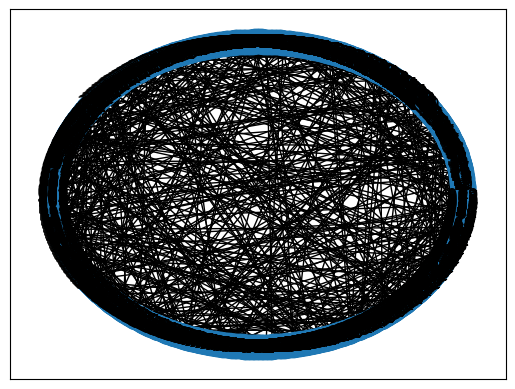

In [ ]:
#  Как будет меняться средний кластерный коэффициент и средний диаметр при увеличении вероятности пересоединения ребра  p =0.1
graph_2 = nx.watts_strogatz_graph(1000, 10, 0.1)
nx.draw_networkx(graph_2, nx.circular_layout(graph_2))
cluster_coefficient = nx.average_clustering(graph_2)


diameter = nx.diameter(graph_2)


average_diameter = nx.average_shortest_path_length(graph_2)



print("Средний кластерный коэффициент:",cluster_coefficient)
print("Средний диаметр:", average_diameter )

Средний кластерный коэффициент: 0.34347927072927076
Средний диаметр: 3.864154154154154


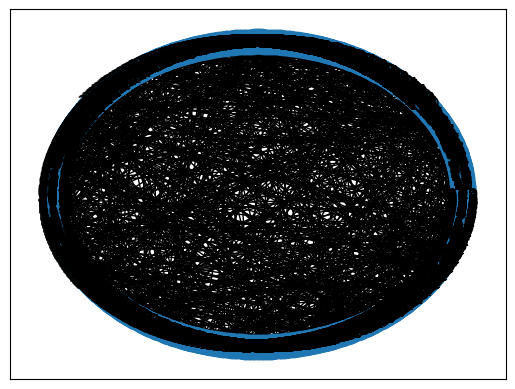

In [ ]:
#  Как будет меняться средний кластерный коэффициент и средний диаметр при увеличении вероятности пересоединения ребра  p =0.2
graph_3 = nx.watts_strogatz_graph(1000, 10, 0.2)
nx.draw_networkx(graph_3, nx.circular_layout(graph_3))
cluster_coefficient = nx.average_clustering(graph_3)


diameter = nx.diameter(graph_3)


average_diameter = nx.average_shortest_path_length(graph_3)



print("Средний кластерный коэффициент:",cluster_coefficient)
print("Средний диаметр:", average_diameter )

Средний кластерный коэффициент: 0.24712775443510762
Средний диаметр: 3.627985985985986


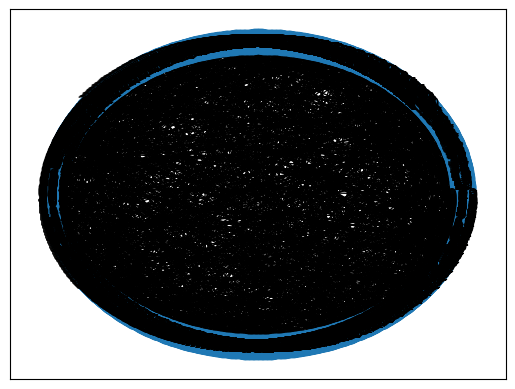

In [ ]:
#  Как будет меняться средний кластерный коэффициент и средний диаметр при увеличении вероятности пересоединения ребра  p =0.3
graph_4 = nx.watts_strogatz_graph(1000, 10, 0.3)
nx.draw_networkx(graph_4, nx.circular_layout(graph_4))
cluster_coefficient = nx.average_clustering(graph_4)


diameter = nx.diameter(graph_4)


average_diameter = nx.average_shortest_path_length(graph_4)



print("Средний кластерный коэффициент:",cluster_coefficient)
print("Средний диаметр:", average_diameter )

Средний кластерный коэффициент: 0.14918203740703792
Средний диаметр: 3.4654774774774775


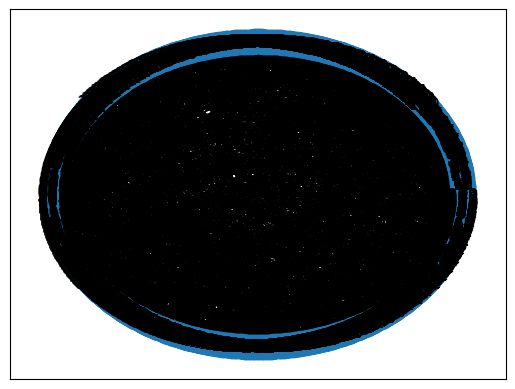

In [ ]:
#  Как будет меняться средний кластерный коэффициент и средний диаметр при увеличении вероятности пересоединения ребра  p =0.4
graph_5 = nx.watts_strogatz_graph(1000, 10, 0.4)
nx.draw_networkx(graph_5, nx.circular_layout(graph_5))
cluster_coefficient = nx.average_clustering(graph_5)


diameter = nx.diameter(graph_5)


average_diameter = nx.average_shortest_path_length(graph_5)



print("Средний кластерный коэффициент:",cluster_coefficient)
print("Средний диаметр:", average_diameter )

Средний кластерный коэффициент: 0.08720389332889364
Средний диаметр: 3.3785165165165165


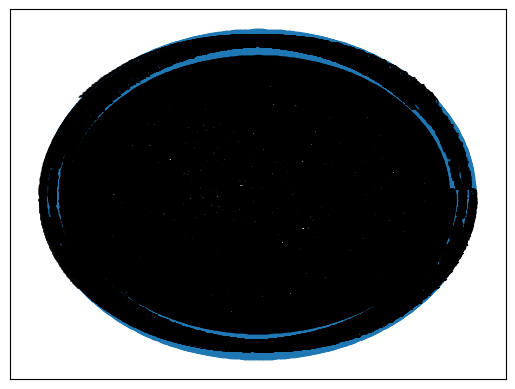

In [ ]:
#  Как будет меняться средний кластерный коэффициент и средний диаметр при увеличении вероятности пересоединения ребра  p =0.5
graph_6 = nx.watts_strogatz_graph(1000, 10, 0.5)
nx.draw_networkx(graph_6, nx.circular_layout(graph_6))
cluster_coefficient = nx.average_clustering(graph_6)


diameter = nx.diameter(graph_6)


average_diameter = nx.average_shortest_path_length(graph_6)



print("Средний кластерный коэффициент:",cluster_coefficient)
print("Средний диаметр:", average_diameter )

Средний кластерный коэффициент: 0.04834058457882018
Средний диаметр: 3.31804004004004


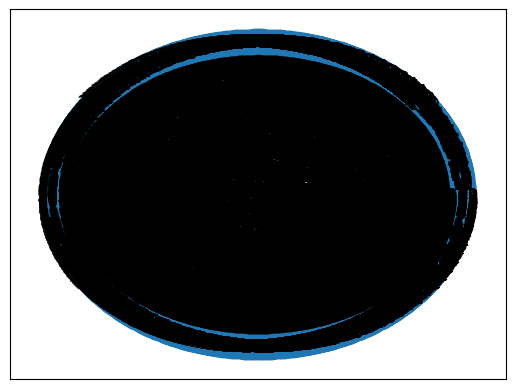

In [ ]:
#  Как будет меняться средний кластерный коэффициент и средний диаметр при увеличении вероятности пересоединения ребра  p =0.6
graph_7 = nx.watts_strogatz_graph(1000, 10, 0.6)
nx.draw_networkx(graph_7, nx.circular_layout(graph_7))
cluster_coefficient = nx.average_clustering(graph_7)


diameter = nx.diameter(graph_7)


average_diameter = nx.average_shortest_path_length(graph_7)



print("Средний кластерный коэффициент:",cluster_coefficient)
print("Средний диаметр:", average_diameter )

**Как будет меняться средний кластерный коэффициент и средний диаметр при увеличении вероятности пересоединения ребра  p  ?**

В модели малого мира, при увеличении вероятности пересоединения ребра p, средний кластерный коэффициент уменьшается, а средний диаметр увеличивается.

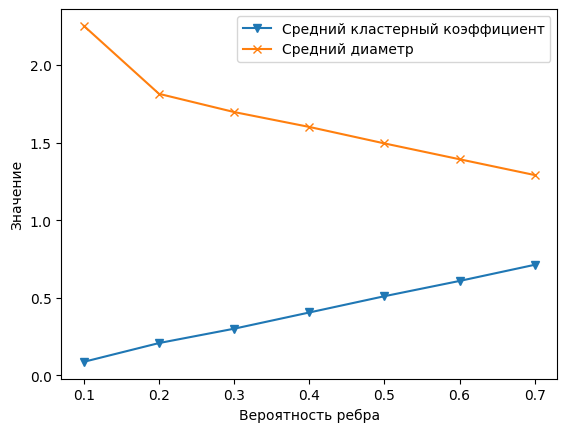

In [ ]:
# Значения вероятности ребра
p_v = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

# Значения среднего кластерного коэффициента
cluster_coefficients = []

# Значения среднего диаметра
average_diameters = []


for p in p_v:
    graph = nx.fast_gnp_random_graph(100, p)

    cluster_coefficient = nx.average_clustering(graph)
    cluster_coefficients.append(cluster_coefficient) #список для всех р

    average_diameter = nx.average_shortest_path_length(graph)
    average_diameters.append(average_diameter)


plt.plot(p_v, cluster_coefficients, marker='v', label='Средний кластерный коэффициент')
plt.plot(p_v, average_diameters, marker='x', label='Средний диаметр')
plt.xlabel('Вероятность ребра')
plt.ylabel('Значение')
plt.legend() # нансим метки
plt.show()

**В. Свойства графа по модели BA (предпочтительных соединений)**
1. Создайте граф по модели BA на $1000$ вершинах. В качестве начального графа возьмите граф $K_5$. Как изменяется минимальная, максимальная и средняя степени вершин в графе при изменении параметра $m = 1 \ldots 5$?
2. Для графов из п. 1 сравните степени вершин с индексами $10, 50, 100, 500$. Сравните с расчетными значениями по формуле.  

3. Как распределены степени  узлов в графах из п.1?

4. Вычислите диаметр и среднюю длину пути для случайных графов из п. 1. Как соотносятся найденные величины с числом узлов в сети?

5. Для графов из п. 1 вычислите средний кластерный коэффициент. Как изменяется средний кластерный коэффициент с ростом числа узлов?


Минимальная степень узла: 1
Максимальная степень узла: 5
Средняя степень узла:  3.0000
Средний кластерный коэффициент: 0.38
Диаметр: 5
Средний диаметр: 2.1555555555555554


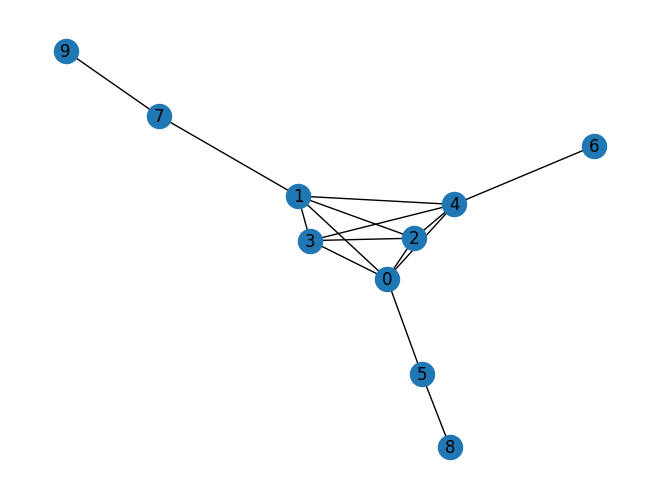

In [ ]:
# Создадим граф BA
G_ba = nx.barabasi_albert_graph(10, 1, initial_graph = nx.complete_graph(5))

nx.draw(G_ba, with_labels = True)
got_node_degrees = [degree[1] for degree in G_ba .degree()] # список степеней узлов
print(f'Минимальная степень узла: {np.min(got_node_degrees)}',
      f'Максимальная степень узла: {np.max(got_node_degrees)}',
      f'Средняя степень узла: {np.mean(got_node_degrees): .4f}', sep='\n')
#print("Узел с индексом 10: степень", np.min(got_node_degrees)[10])
cluster_coefficient = nx.average_clustering(G_ba)
diameter = nx.diameter(G_ba)
average_diameter = nx.average_shortest_path_length(G_ba)
print("Средний кластерный коэффициент:",cluster_coefficient)
print("Диаметр:", diameter )
print("Средний диаметр:", average_diameter )

Минимальная степень узла: 2
Максимальная степень узла: 7
Средняя степень узла:  4.0000
Средний кластерный коэффициент: 0.7985714285714286
Диаметр: 3
Средний диаметр: 1.6


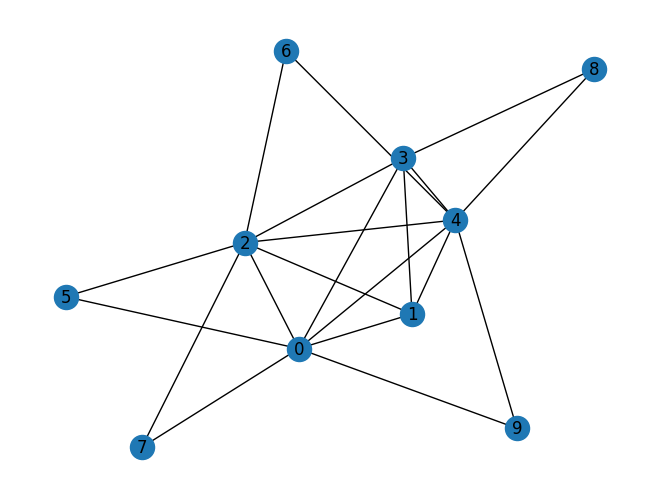

In [ ]:
# Создадим граф BA
G_ba = nx.barabasi_albert_graph(10, 2, initial_graph = nx.complete_graph(5))

nx.draw(G_ba, with_labels = True)
got_node_degrees = [degree[1] for degree in G_ba .degree()] # список степеней узлов
print(f'Минимальная степень узла: {np.min(got_node_degrees)}',
      f'Максимальная степень узла: {np.max(got_node_degrees)}',
      f'Средняя степень узла: {np.mean(got_node_degrees): .4f}', sep='\n')
cluster_coefficient = nx.average_clustering(G_ba)
diameter = nx.diameter(G_ba)
average_diameter = nx.average_shortest_path_length(G_ba)
print("Средний кластерный коэффициент:",cluster_coefficient)
print("Диаметр:", diameter )
print("Средний диаметр:", average_diameter )

Минимальная степень узла: 3
Максимальная степень узла: 8
Средняя степень узла:  5.0000
Средний кластерный коэффициент: 0.6023809523809524
Диаметр: 3
Средний диаметр: 1.4666666666666666


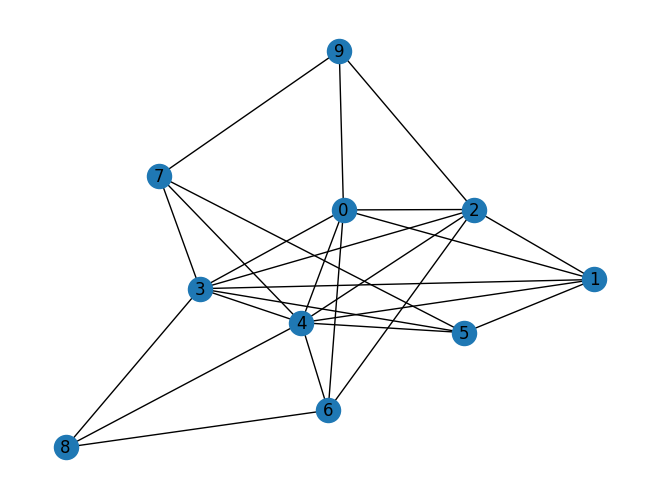

In [ ]:
# Создадим граф BA
G_ba = nx.barabasi_albert_graph(10, 3, initial_graph = nx.complete_graph(5))

nx.draw(G_ba, with_labels = True)
got_node_degrees = [degree[1] for degree in G_ba .degree()] # список степеней узлов
print(f'Минимальная степень узла: {np.min(got_node_degrees)}',
      f'Максимальная степень узла: {np.max(got_node_degrees)}',
      f'Средняя степень узла: {np.mean(got_node_degrees): .4f}', sep='\n')
cluster_coefficient = nx.average_clustering(G_ba)
diameter = nx.diameter(G_ba)
average_diameter = nx.average_shortest_path_length(G_ba)
print("Средний кластерный коэффициент:",cluster_coefficient)
print("Диаметр:", diameter )
print("Средний диаметр:", average_diameter )

Минимальная степень узла: 4
Максимальная степень узла: 8
Средняя степень узла:  6.0000
Средний кластерный коэффициент: 0.7392857142857142
Диаметр: 2
Средний диаметр: 1.3333333333333333


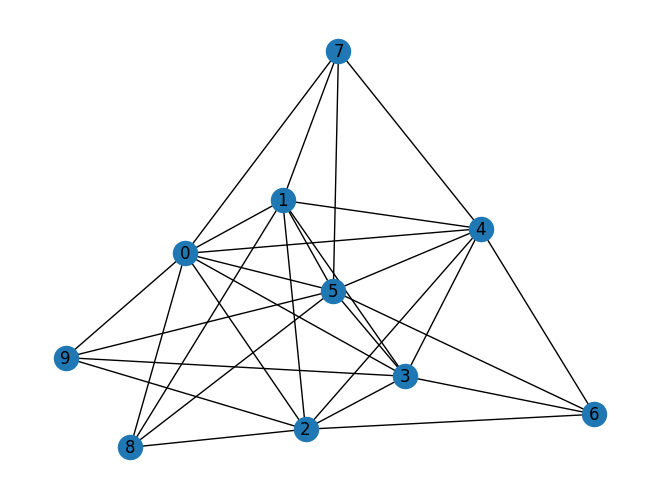

In [ ]:
# Создадим граф BA не выводить много цфир после запятой !
#№№№ не выводить много цфир после запятой !
G_ba = nx.barabasi_albert_graph(10, 4, initial_graph = nx.complete_graph(5))

nx.draw(G_ba, with_labels = True)
got_node_degrees = [degree[1] for degree in G_ba .degree()] # список степеней узлов
print(f'Минимальная степень узла: {np.min(got_node_degrees)}',
      f'Максимальная степень узла: {np.max(got_node_degrees)}',
      f'Средняя степень узла: {np.mean(got_node_degrees): .4f}', sep='\n')
cluster_coefficient = nx.average_clustering(G_ba)
diameter = nx.diameter(G_ba)
average_diameter = nx.average_shortest_path_length(G_ba)
print("Средний кластерный коэффициент:",cluster_coefficient)
print("Диаметр:", diameter )
print("Средний диаметр:", average_diameter )

Минимальная степень узла: 5
Максимальная степень узла: 9
Средняя степень узла:  7.0000
Средний кластерный коэффициент: 0.8165873015873016
Диаметр: 2
Средний диаметр: 1.2222222222222223


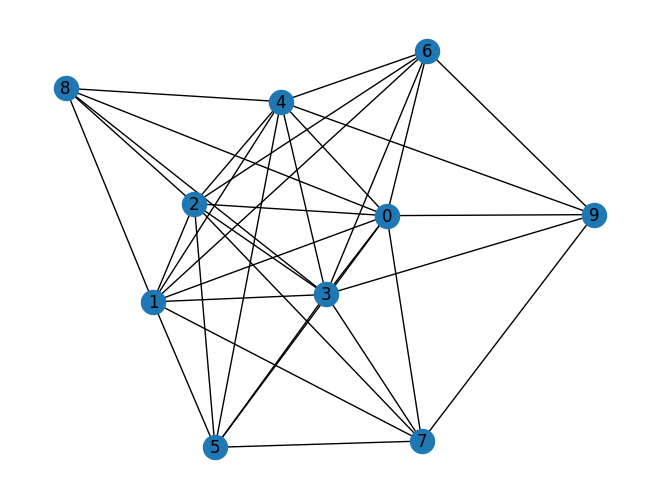

In [ ]:
# Создадим граф BA
G_ba = nx.barabasi_albert_graph(10, 5, initial_graph = nx.complete_graph(5))

nx.draw(G_ba, with_labels = True)
got_node_degrees = [degree[1] for degree in G_ba .degree()] # список степеней узлов
print(f'Минимальная степень узла: {np.min(got_node_degrees)}',
      f'Максимальная степень узла: {np.max(got_node_degrees)}',
      f'Средняя степень узла: {np.mean(got_node_degrees): .4f}', sep='\n')
cluster_coefficient = nx.average_clustering(G_ba)
diameter = nx.diameter(G_ba)
average_diameter = nx.average_shortest_path_length(G_ba)
print("Средний кластерный коэффициент:",cluster_coefficient)
print("Диаметр:", diameter )
print("Средний диаметр:", average_diameter )

** Как изменяется минимальная, максимальная и средняя степени вершин в графе при изменении параметра  m=1…5 ?**

 Минимальная и макимальная и средняя увеличиваются


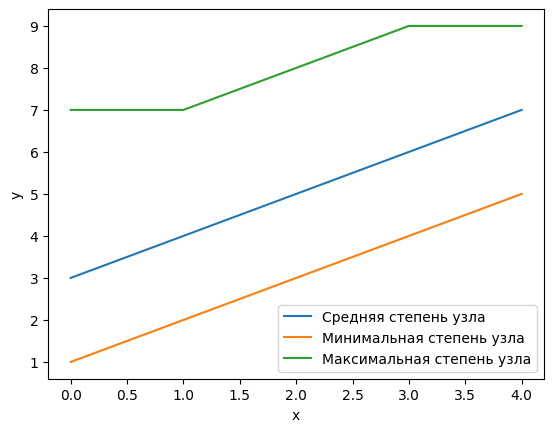

In [ ]:
# по значениям графов
#попрбовать посмтреть как получать числа автоматически(посмотреть рабоыт 4 курса)
mean_degree = [3, 4, 5, 6, 7]
min_degree = [1, 2, 3, 4, 5]
max_degree = [7, 7, 8, 9, 9]

# Строим график
plt.plot(mean_degree, label='Средняя степень узла')
plt.plot(min_degree, label='Минимальная степень узла')
plt.plot(max_degree, label='Максимальная степень узла')

# Добавляем подписи осей и легенду
plt.xlabel('x')
plt.ylabel('y')
plt.legend()



# Отображаем график
plt.show()

**Вычислите диаметр и среднюю длину пути для случайных графов из п. 1. Как соотносятся найденные величины с числом узлов в сети?**


1.   Диаметр уменьшается(наибольшее расстояние между двумя узлами в графе уменьшается(появляются новые пути))
2.   средняя длина пути уменьшается(с добавленем новых узлов средняя длина пути уменьшается).




**Для графов из п. 1 вычислите средний кластерный коэффициент. Для графов из п. 1 вычислите средний кластерный коэффициент. Как изменяется средний кластерный коэффициент с ростом числа узлов?**

 Средний кластерный коэффициент в **данном** случае будет расти, так как связи между узлами становятся более плотными, и граф становится более связным

# **5 задание**
**I. Эпидемии на сетях**

1. Для графа карате клуба смоделировать развитие эпидемии по моделям SI, SIS, SIR для различных значений параметров моделей. Изменяется ли характер распространения эпидемии при изменении параметров моделей?
2. Создайте граф по модели BA на $1000$ вершинах. В качестве начального графа возьмите граф $K_5$,  $m = 2$. Смоделируйте развитие эпидемии по модели SIR. Доля изначально зараженных узлов положите равной $0.01$.
  * Подберите параметры модели так, чтобы эпидемия охватила весь граф (почти весь).
  * Как меняются кривые заражения для узлов различной степени?
  * Меняется ли скорость распространения эпидемии в зависимости от  первоначально зараженных узлов?

In [ ]:
import random
import networkx as nx
import numpy as np
from scipy.integrate import odeint

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

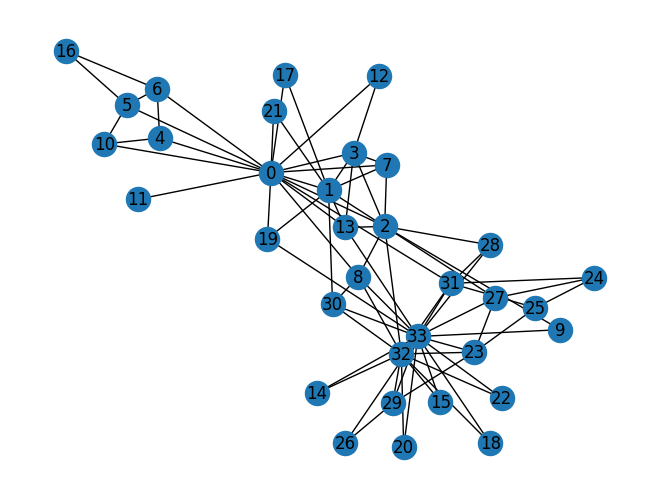

In [ ]:

k= nx.karate_club_graph()
nx.draw(k, with_labels=True)
plt.show()

In [ ]:
# устанавливаем библиотеку
!pip install ndlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.2/110.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 40.2 MB/s eta 0:00:00


In [ ]:
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

# SIR

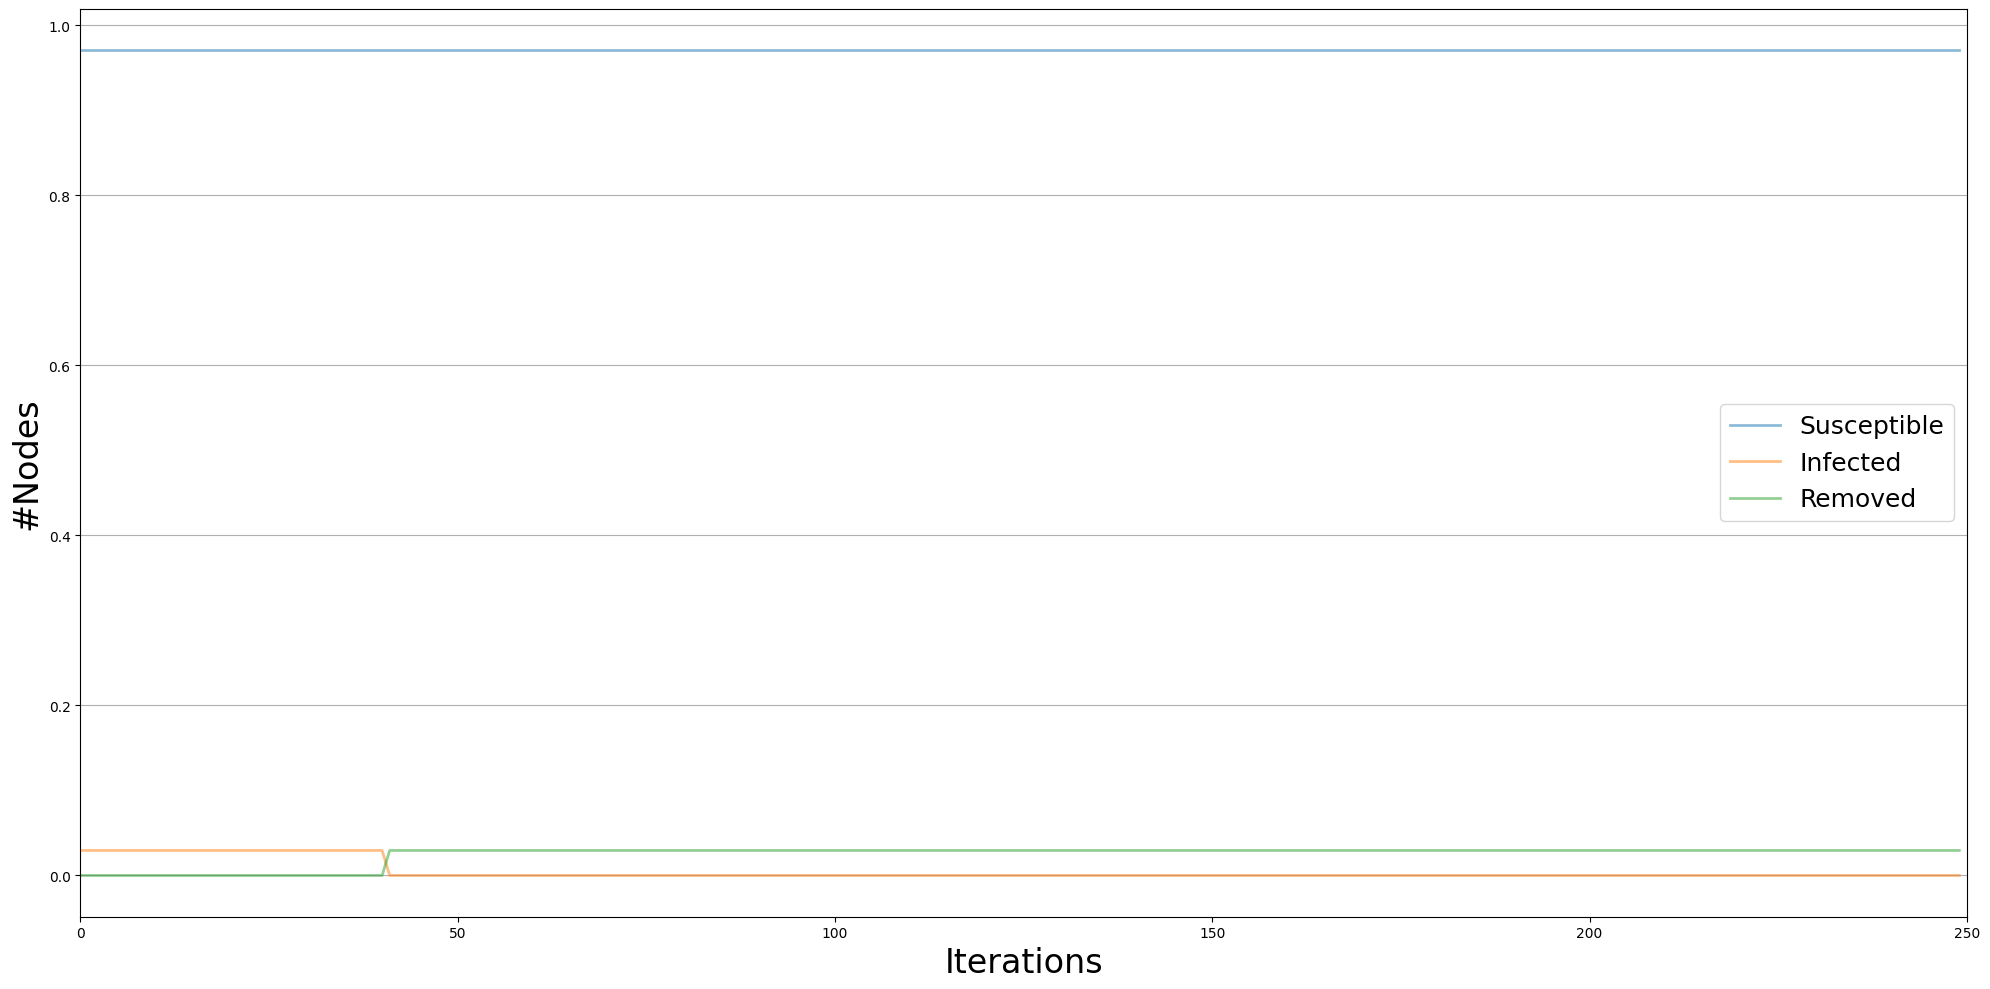

In [ ]:
# Выбираем модель эпидемии
model = ep.SIRModel(k )

# Параметры модели
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('gamma', 0.01)
config.add_model_parameter("fraction_infected", 0.01)
model.set_initial_status(config)

# Запускаем расчеты
iterations = model.iteration_bunch(250)
trends = model.build_trends(iterations)

# визуализация
viz = DiffusionTrend(model, trends)
viz.plot()

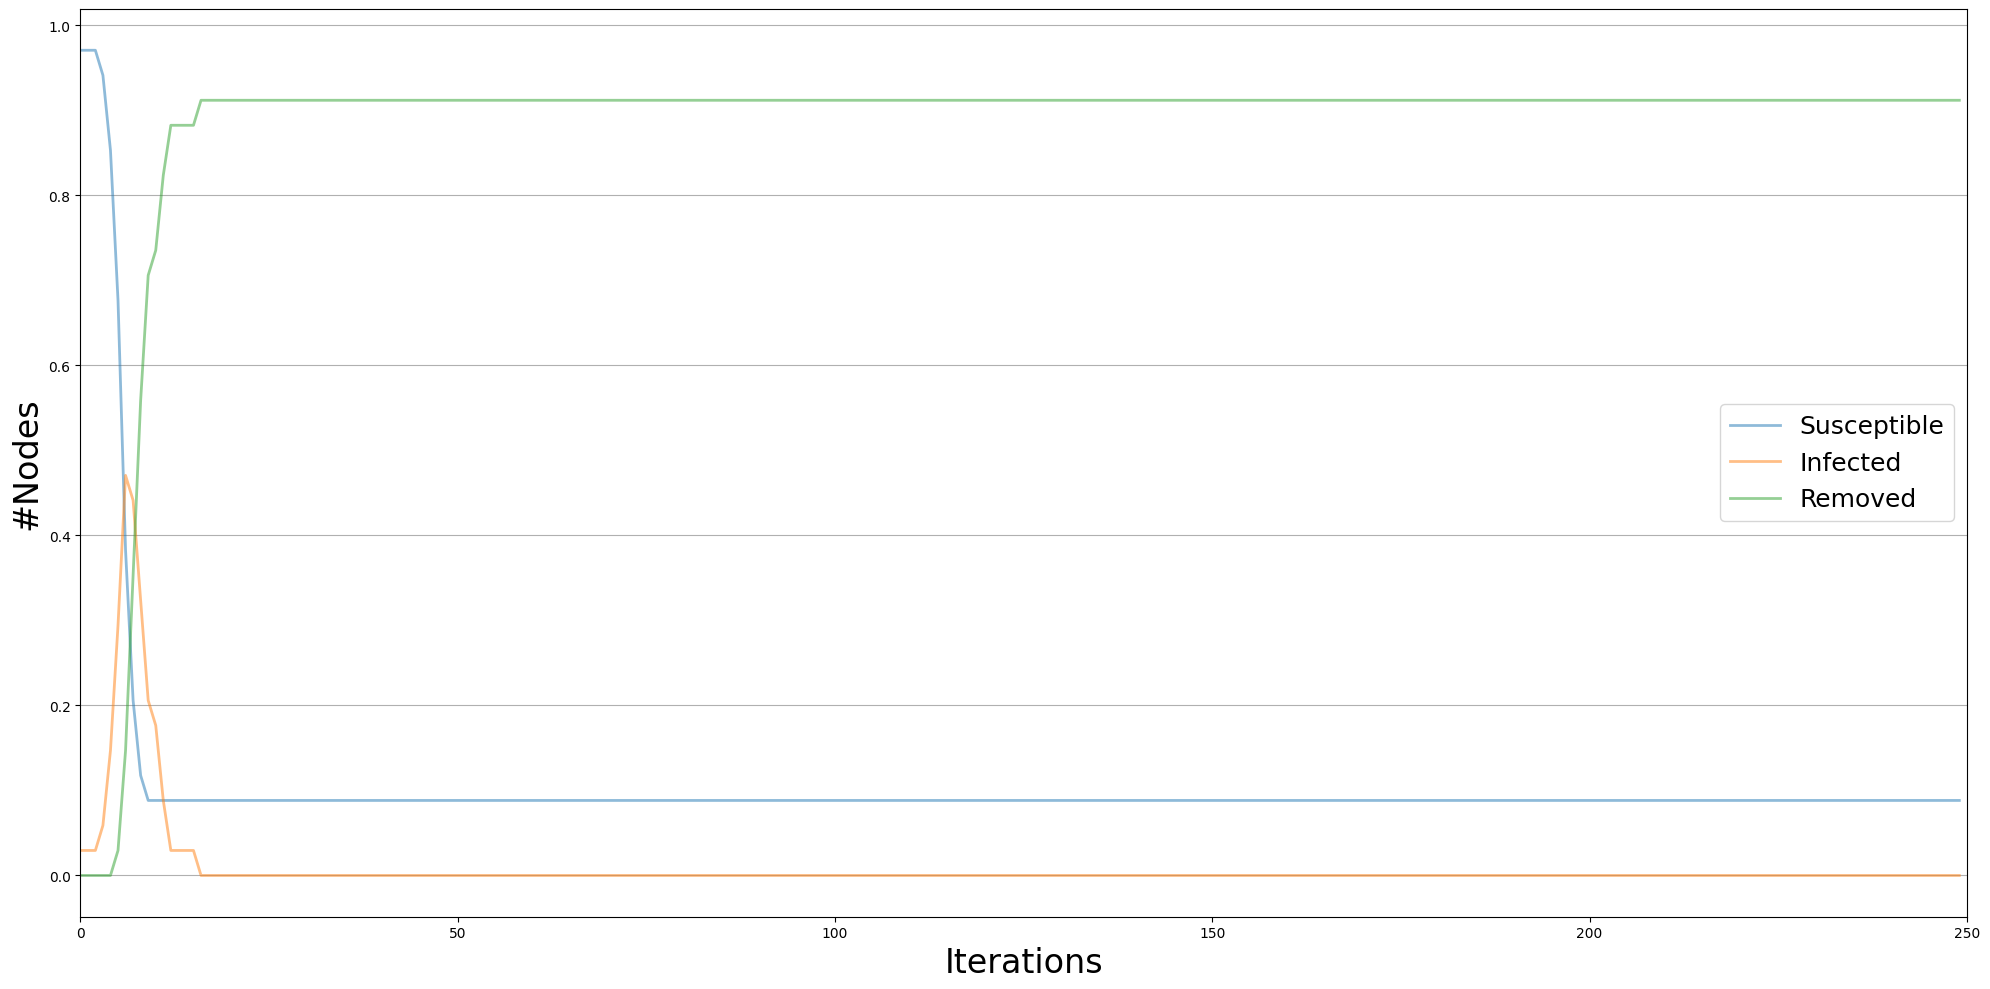

In [ ]:
# Выбираем модель эпидемии
model = ep.SIRModel(k )

# Параметры модели
config = mc.Configuration()
config.add_model_parameter('beta', 0.3)
config.add_model_parameter('gamma', 0.4)
config.add_model_parameter("fraction_infected", 0.01)
model.set_initial_status(config)

# Запускаем расчеты
iterations = model.iteration_bunch(250)
trends = model.build_trends(iterations)

# визуализация
viz = DiffusionTrend(model, trends)
viz.plot()

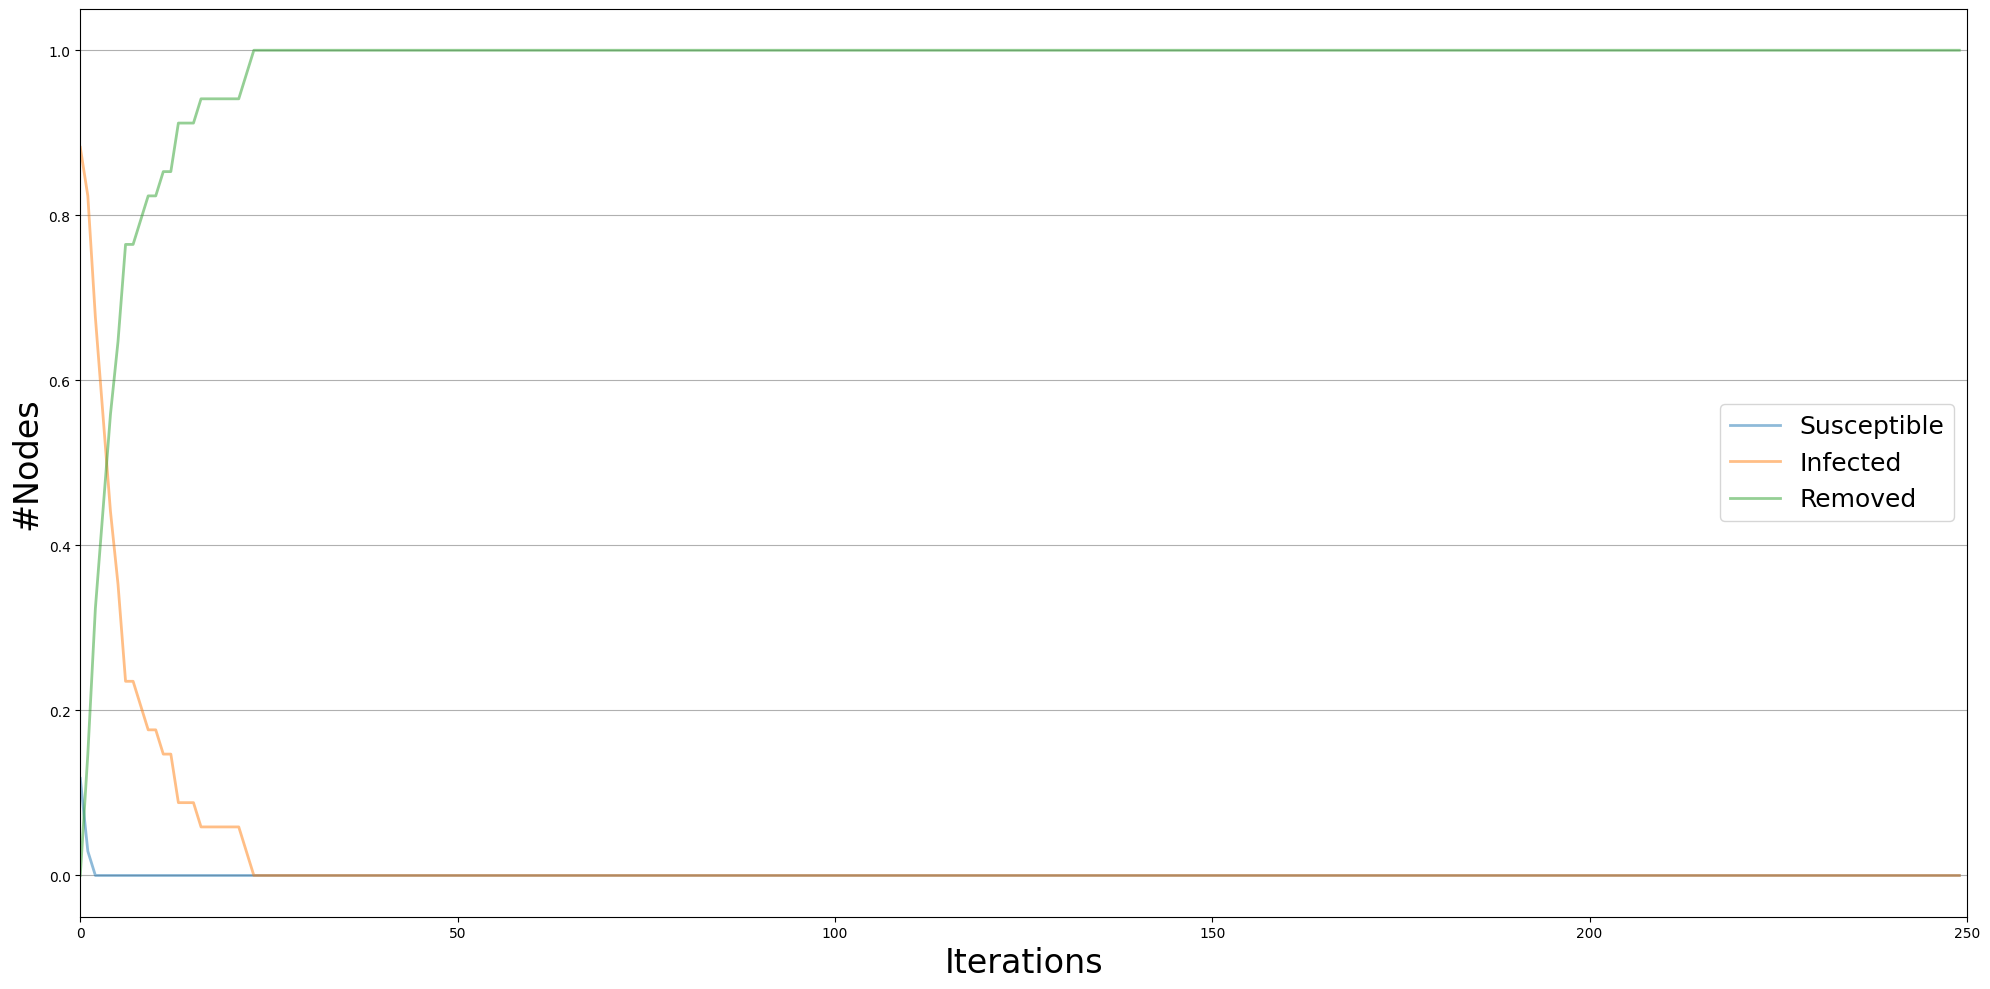

In [ ]:
# Выбираем модель эпидемии
model = ep.SIRModel(k )

# Параметры модели
config = mc.Configuration()
config.add_model_parameter('beta', 0.9)
config.add_model_parameter('gamma', 0.2)
config.add_model_parameter("fraction_infected", 0.9)
model.set_initial_status(config)

# Запускаем расчеты
iterations = model.iteration_bunch(250)
trends = model.build_trends(iterations)

# визуализация
viz = DiffusionTrend(model, trends)
viz.plot()

# SI

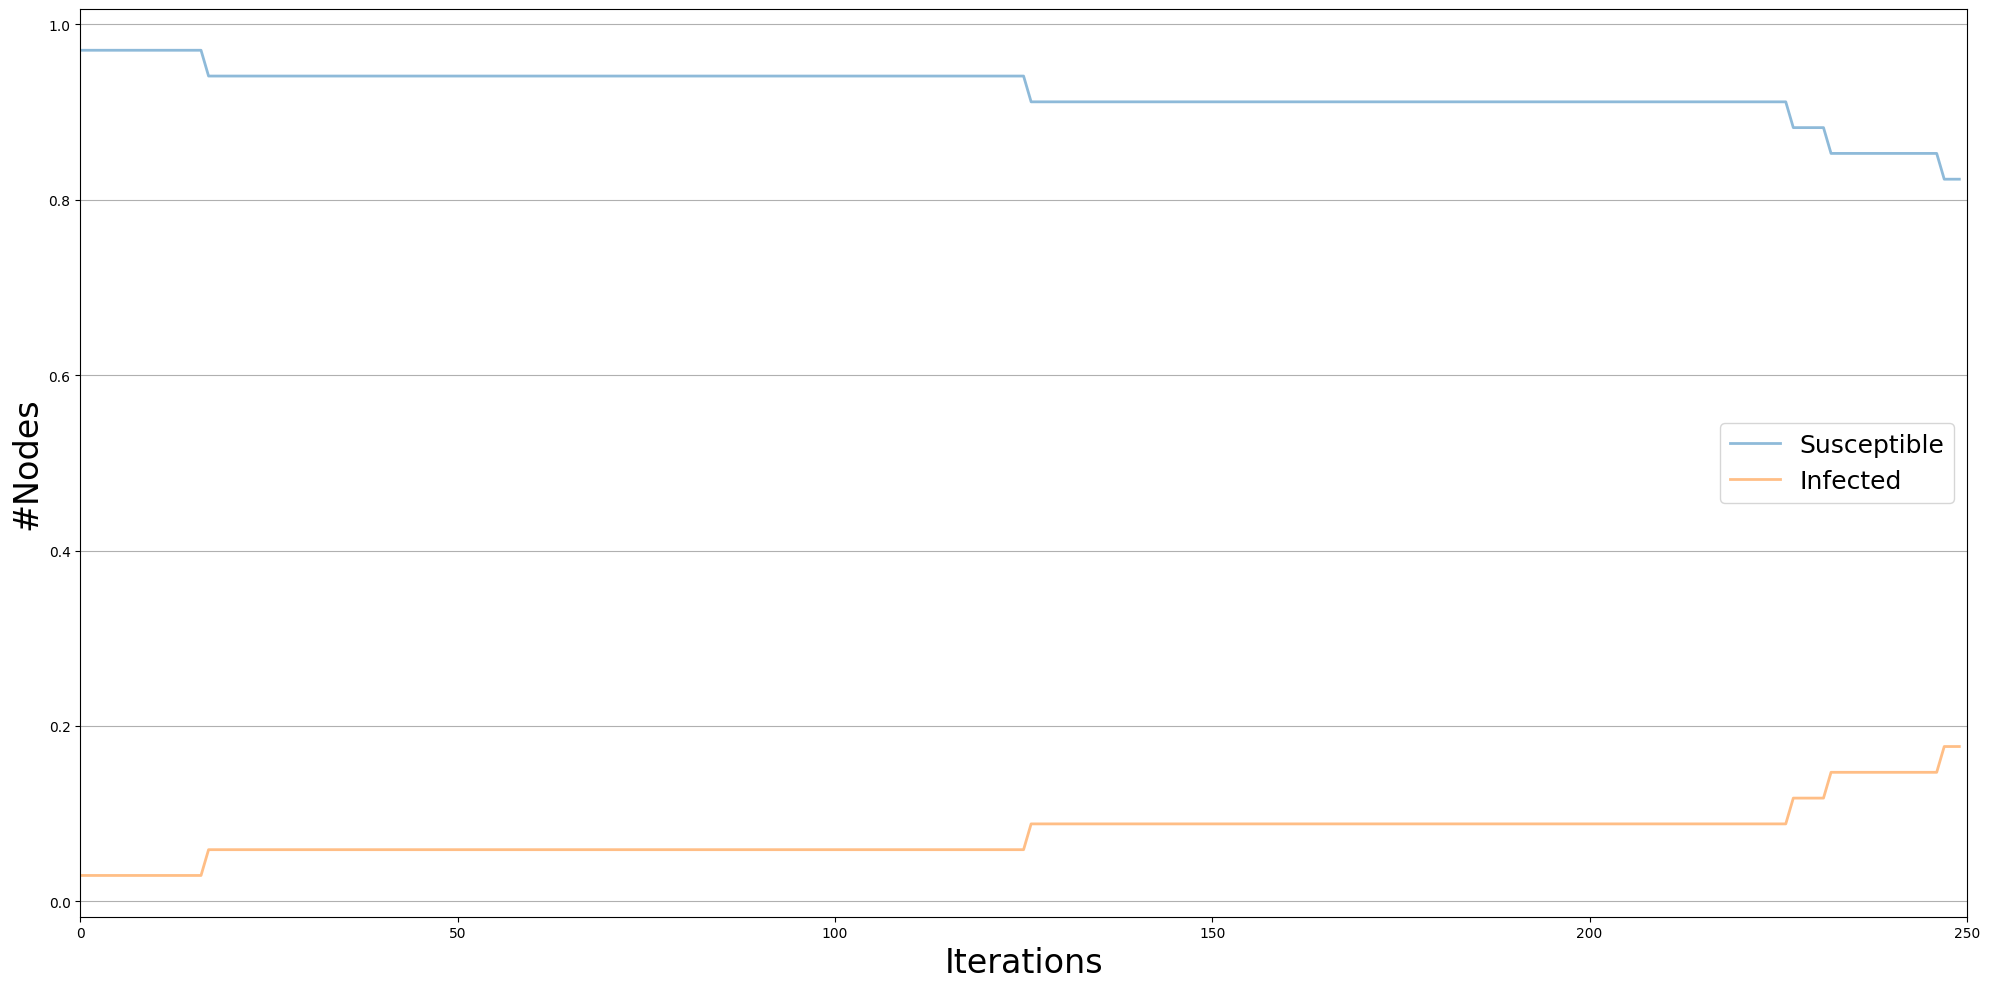

In [ ]:
# Выбираем модель эпидемии
model = ep.SIModel(k )

# Параметры модели
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('gamma', 0.01)
config.add_model_parameter("fraction_infected", 0.01)
model.set_initial_status(config)

# Запускаем расчеты
iterations = model.iteration_bunch(250)
trends = model.build_trends(iterations)

# визуализация
viz = DiffusionTrend(model, trends)
viz.plot()

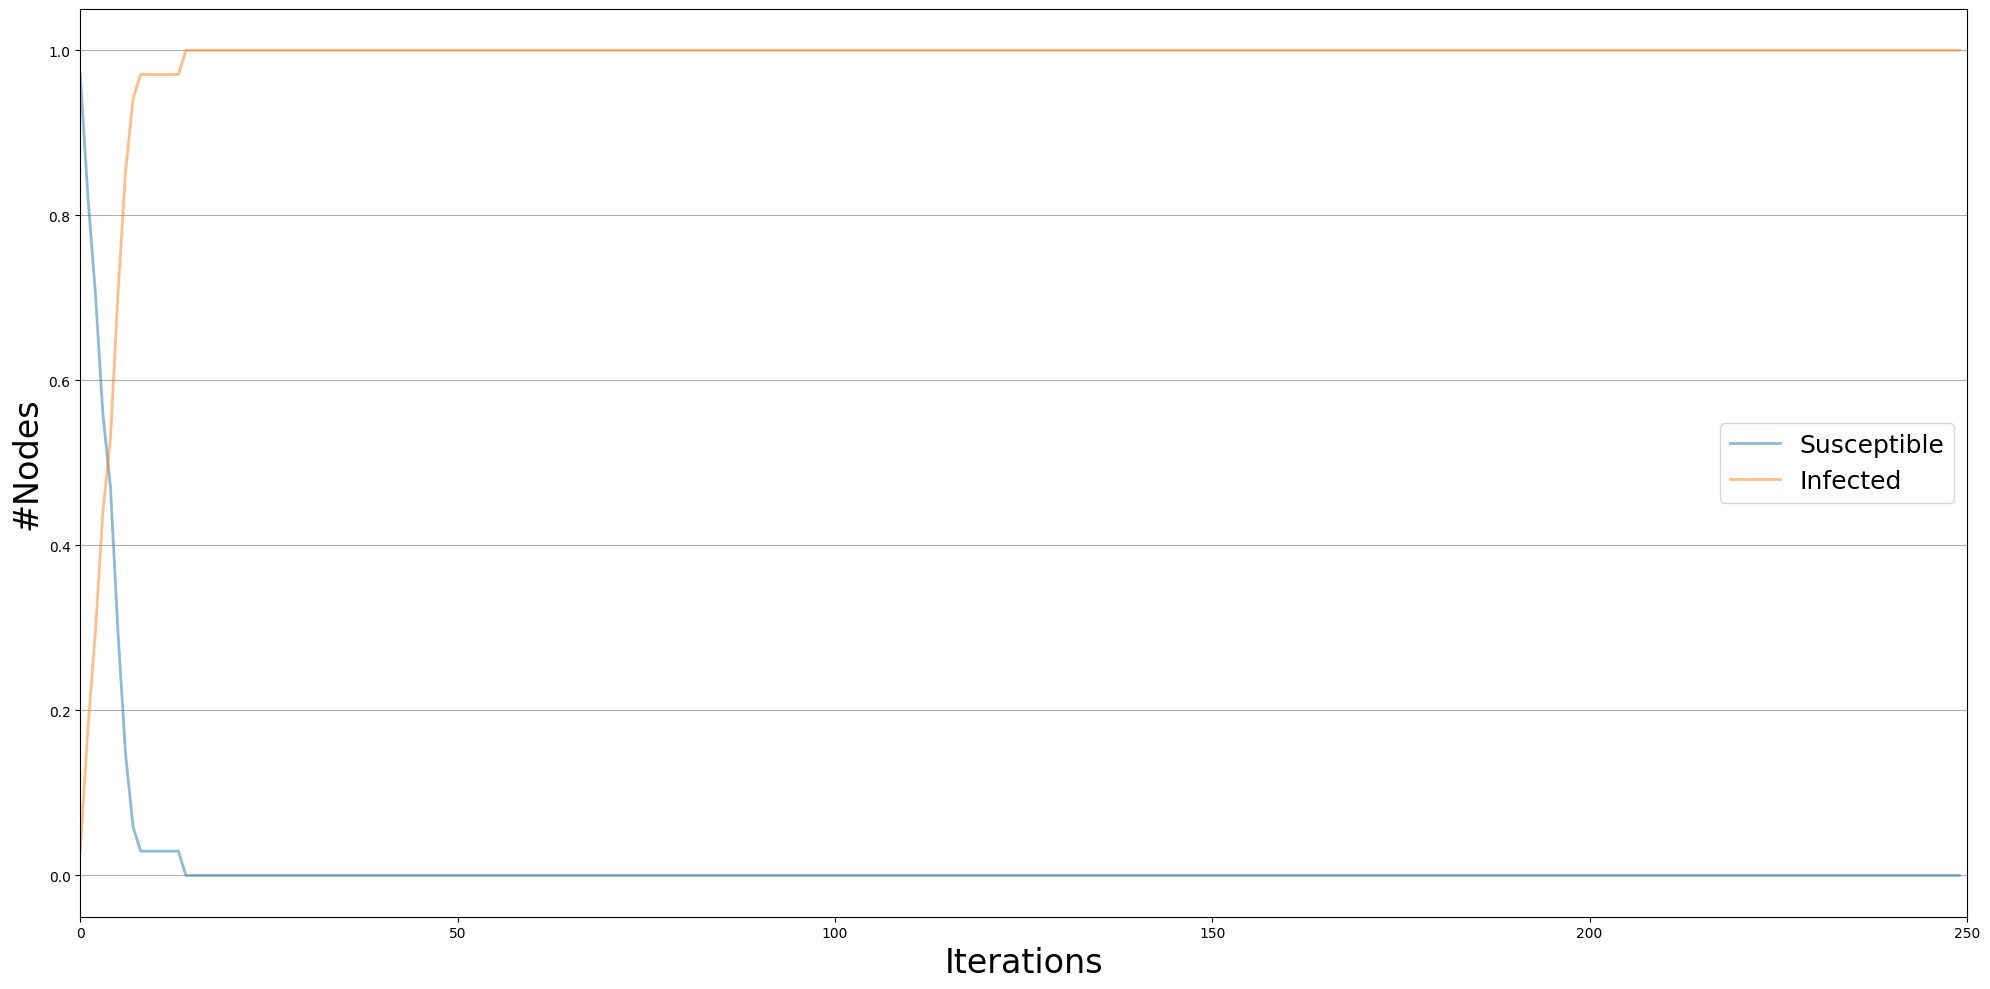

In [ ]:
# Выбираем модель эпидемии
model = ep.SIModel(k )

# Параметры модели
config = mc.Configuration()
config.add_model_parameter('beta', 0.3)
config.add_model_parameter('gamma', 0.4)
config.add_model_parameter("fraction_infected", 0.01)
model.set_initial_status(config)

# Запускаем расчеты
iterations = model.iteration_bunch(250)
trends = model.build_trends(iterations)

# визуализация
viz = DiffusionTrend(model, trends)
viz.plot()

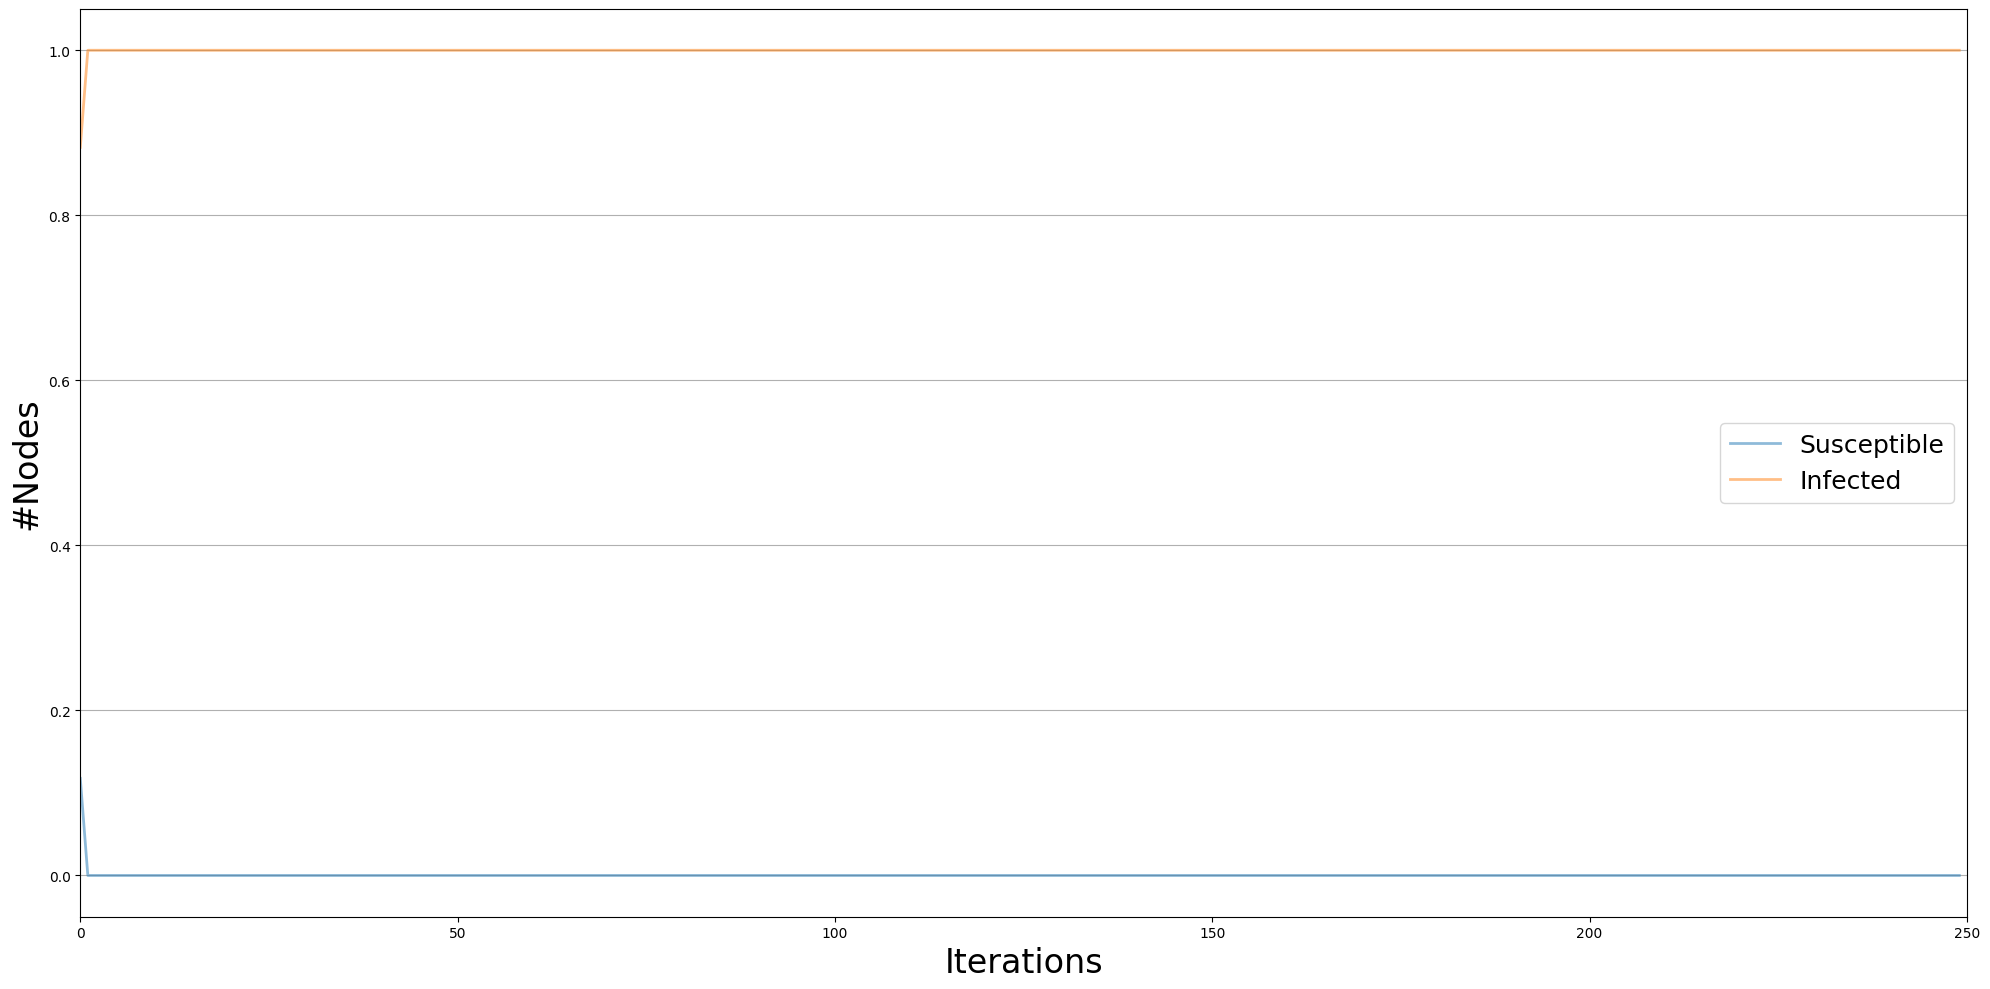

In [ ]:
# Выбираем модель эпидемии
model = ep.SIModel(k )

# Параметры модели
config = mc.Configuration()
config.add_model_parameter('beta', 0.6)
config.add_model_parameter('gamma', 0.4)
config.add_model_parameter("fraction_infected", 0.9)
model.set_initial_status(config)

# Запускаем расчеты
iterations = model.iteration_bunch(250)
trends = model.build_trends(iterations)

# визуализация
viz = DiffusionTrend(model, trends)
viz.plot()

# SIS

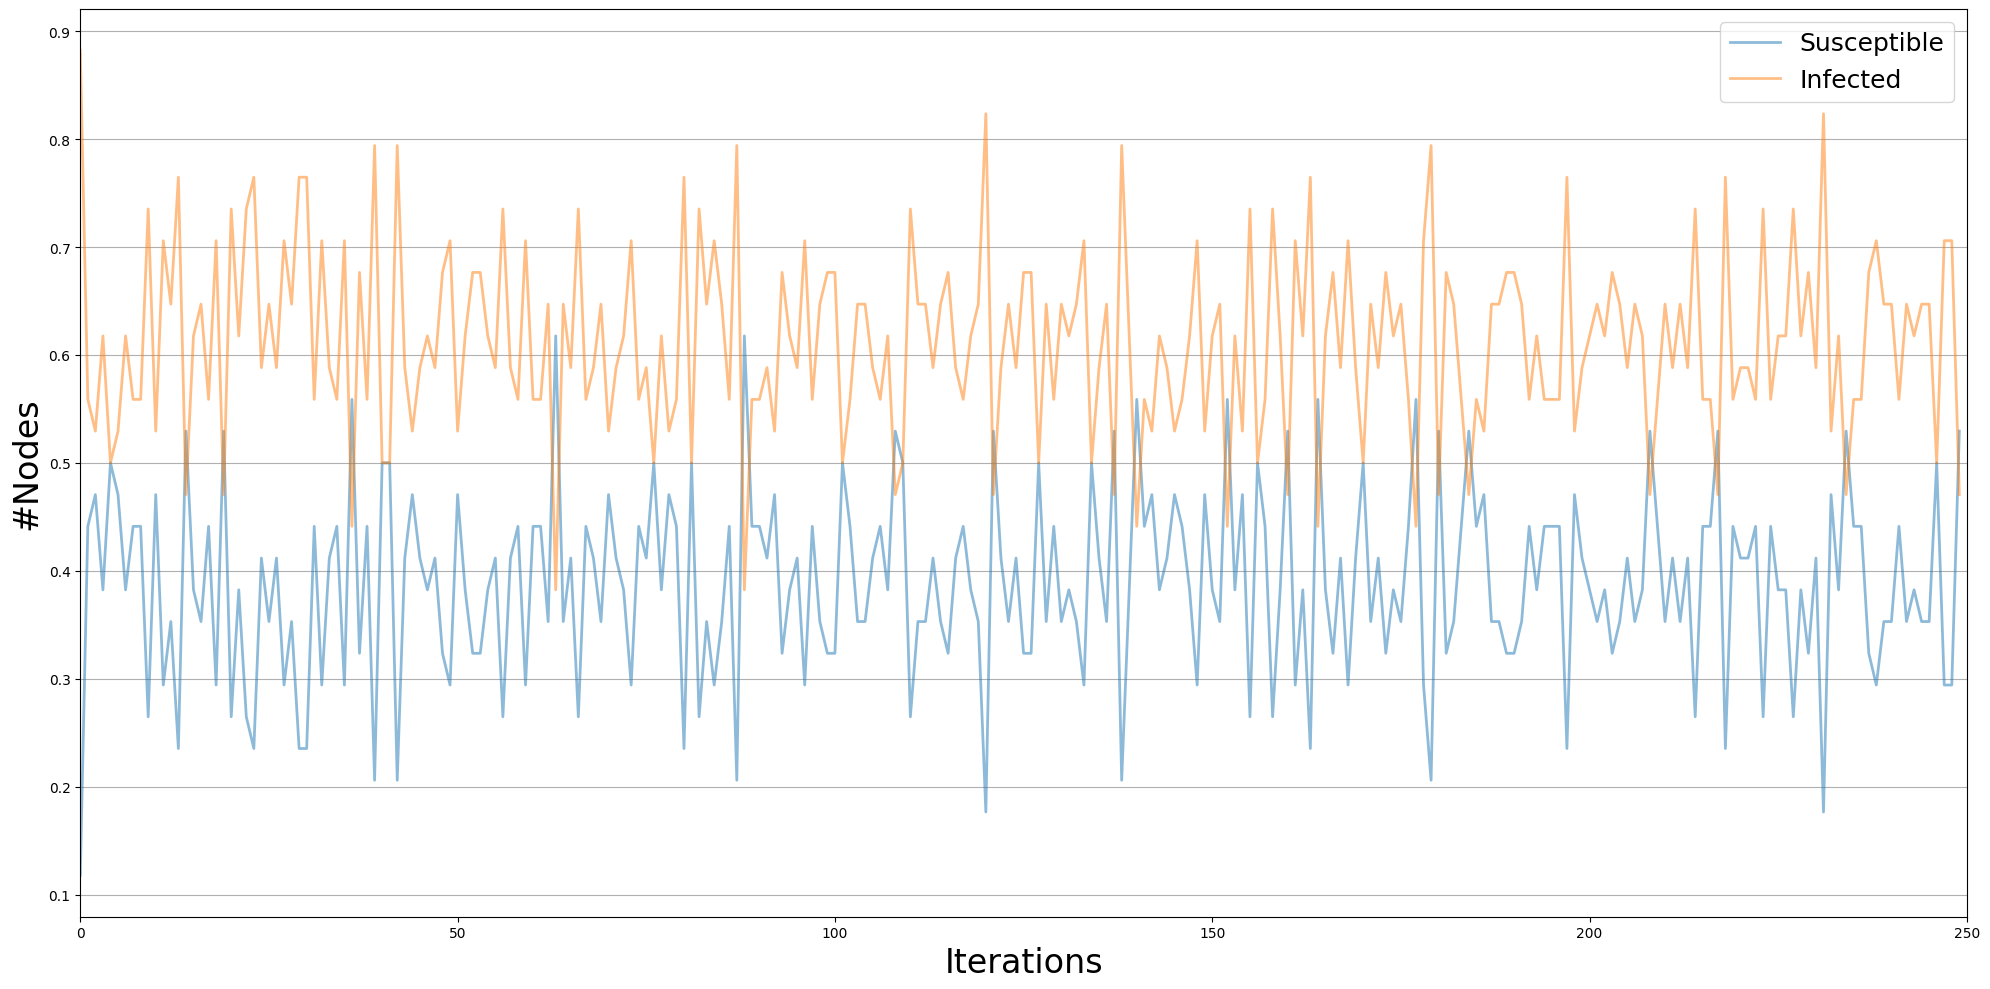

In [ ]:
# Выбираем модель эпидемии
model = ep.SISModel(k )

# Параметры модели
config = mc.Configuration()
config.add_model_parameter('beta', 0.6)
config.add_model_parameter('gamma', 0.4)
config.add_model_parameter("fraction_infected", 0.9)
config.add_model_parameter("lambda", 0.5)
model.set_initial_status(config)

# Запускаем расчеты
iterations = model.iteration_bunch(250)
trends = model.build_trends(iterations)

# визуализация
viz = DiffusionTrend(model, trends)
viz.plot()

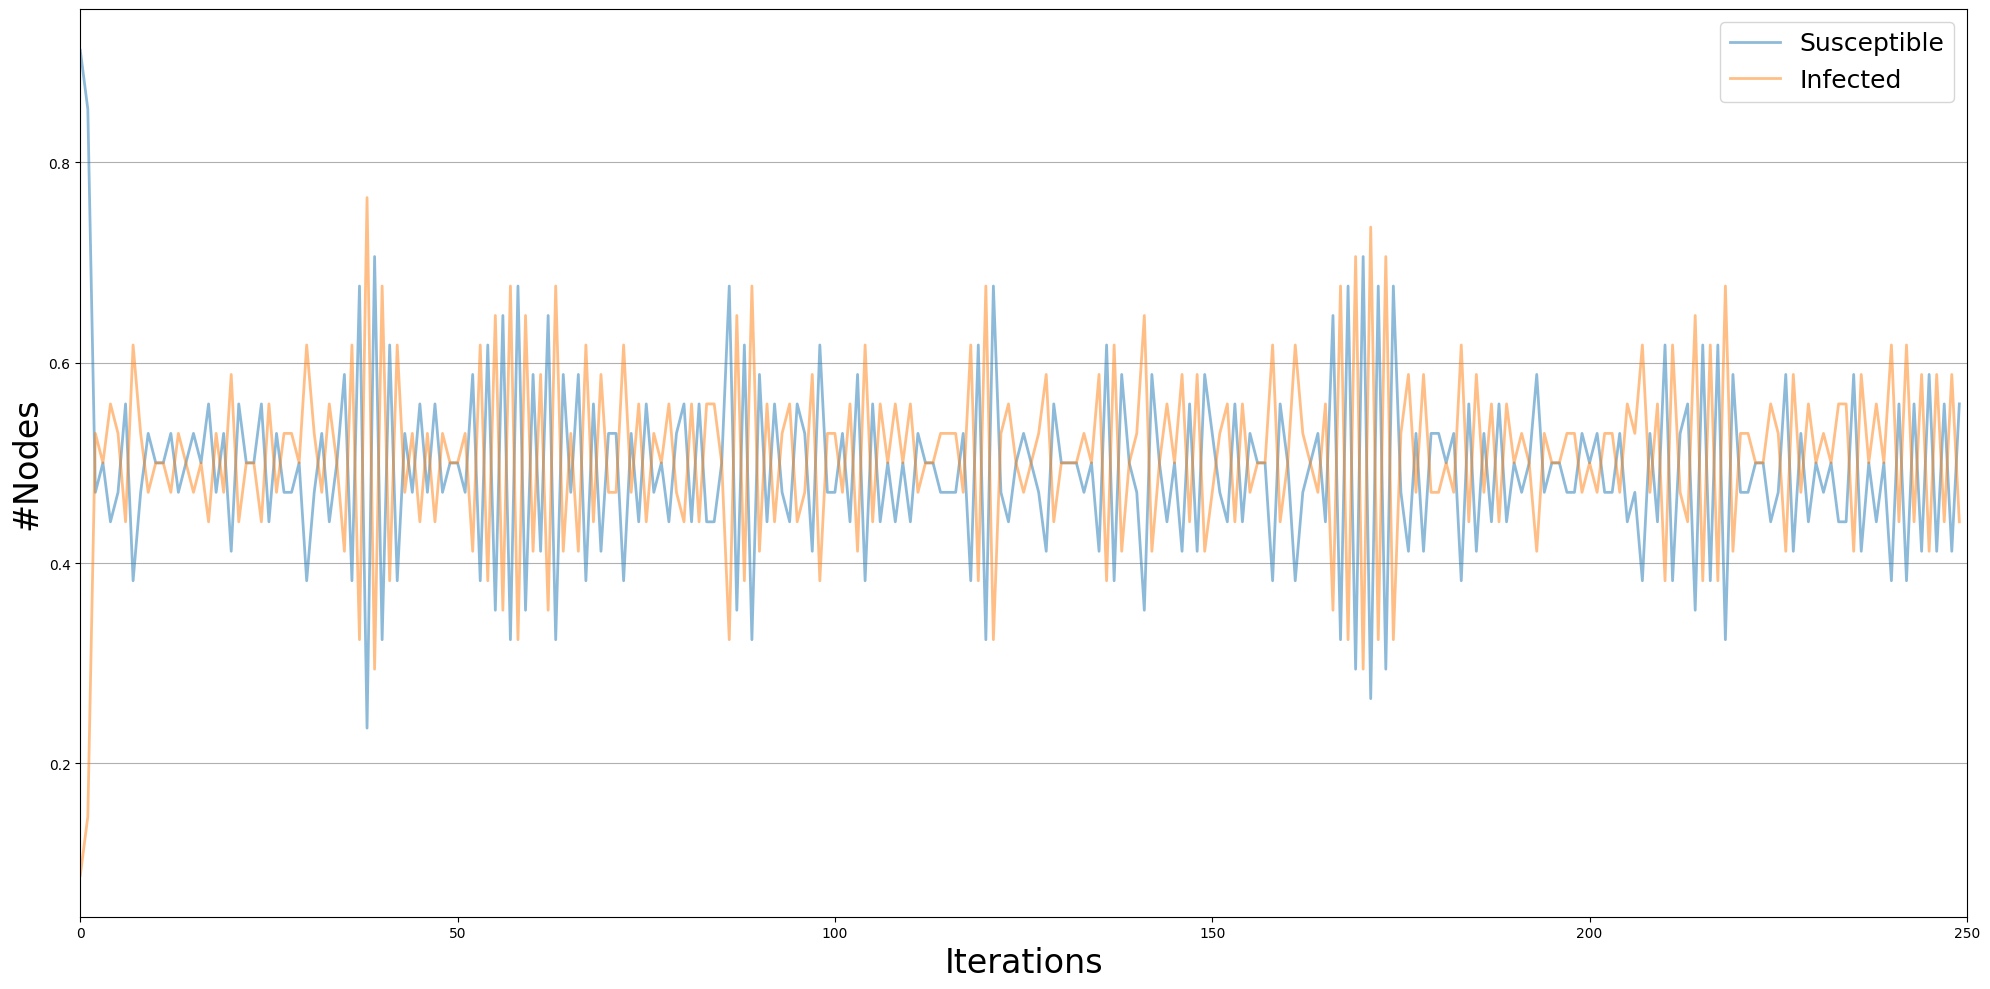

In [ ]:
# Выбираем модель эпидемии
model = ep.SISModel(k )

# Параметры модели
config = mc.Configuration()
config.add_model_parameter('beta', 0.9)
config.add_model_parameter('gamma', 0.2)
config.add_model_parameter("fraction_infected", 0.1)
config.add_model_parameter("lambda", 0.9)
model.set_initial_status(config)

# Запускаем расчеты
iterations = model.iteration_bunch(250)
trends = model.build_trends(iterations)

# визуализация
viz = DiffusionTrend(model, trends)
viz.plot()

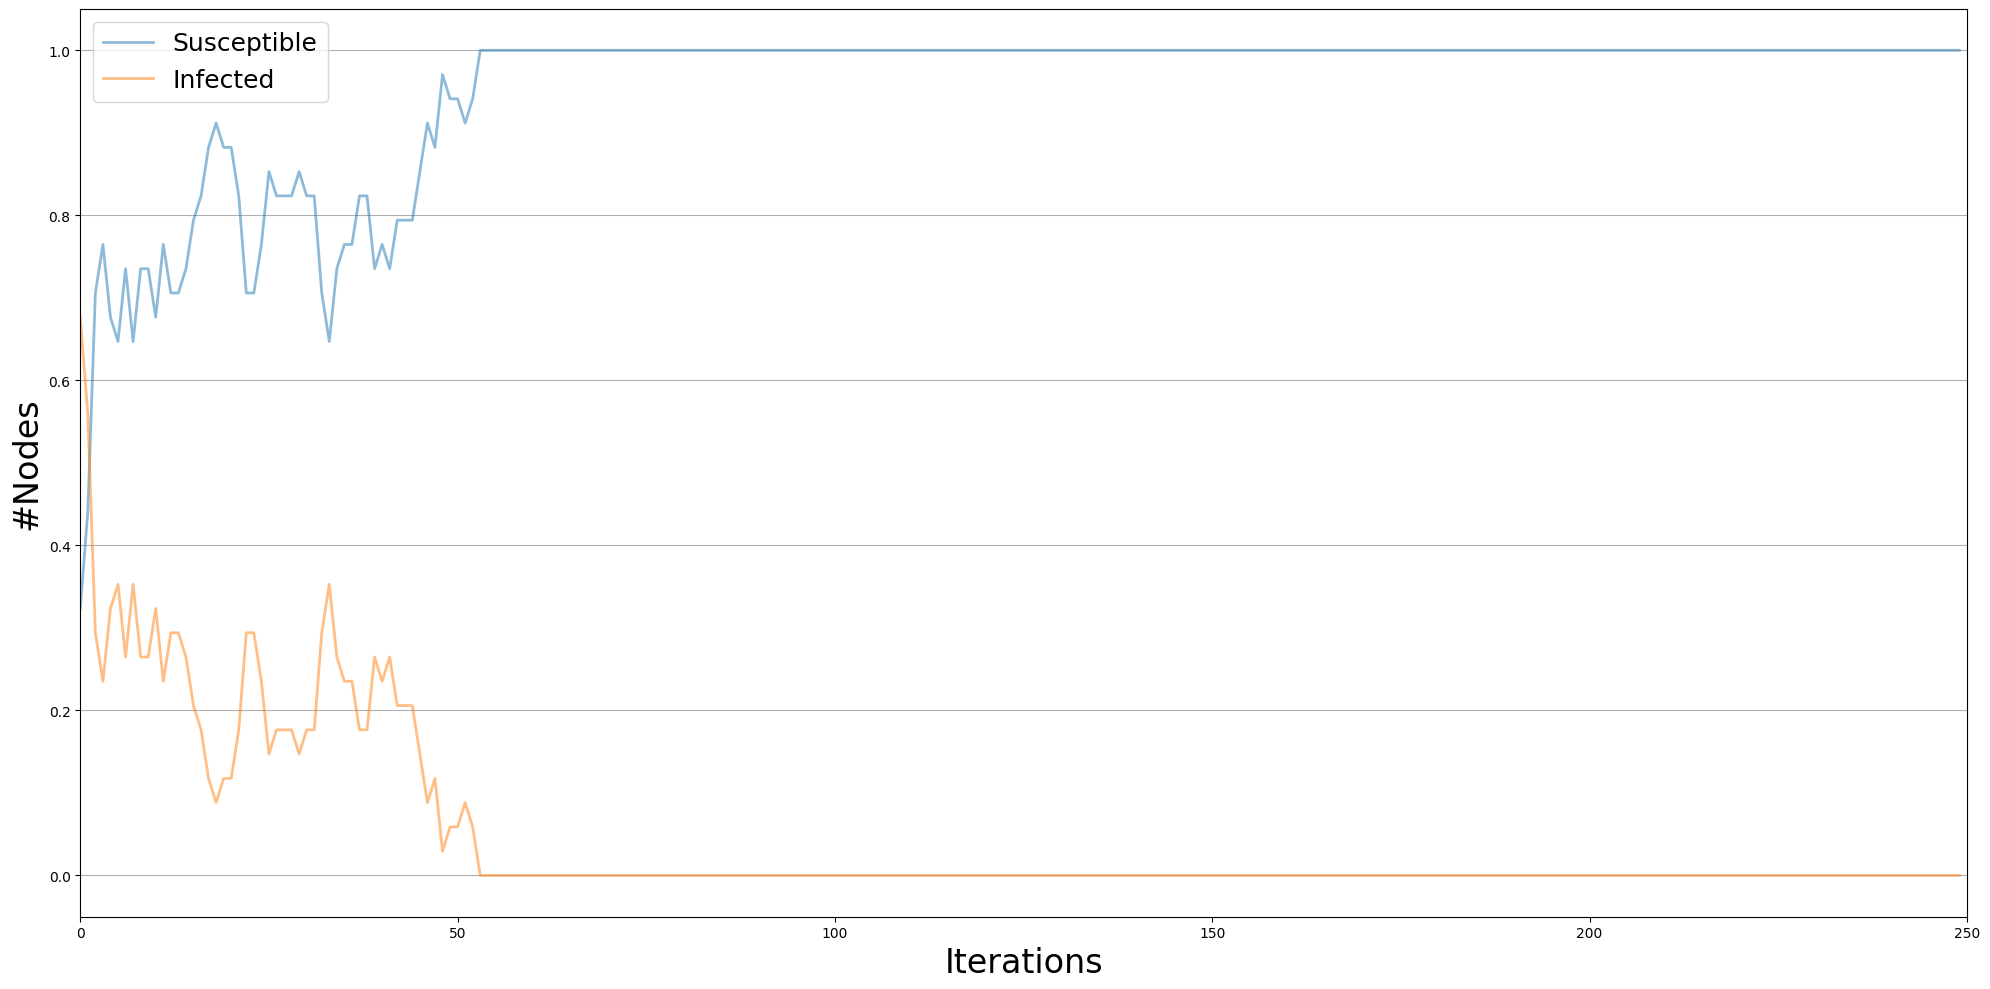

In [ ]:
# Выбираем модель эпидемии
model = ep.SISModel(k )

# Параметры модели
config = mc.Configuration()
config.add_model_parameter('beta', 0.1)
config.add_model_parameter('gamma', 0.9)
config.add_model_parameter("fraction_infected", 0.7)
config.add_model_parameter("lambda", 0.4)
model.set_initial_status(config)

# Запускаем расчеты
iterations = model.iteration_bunch(250)
trends = model.build_trends(iterations)

# визуализация
viz = DiffusionTrend(model, trends)
viz.plot()

### **Для графа карате клуба смоделировать развитие эпидемии по моделям SI, SIS, SIR для различных значений параметров моделей. Изменяется ли характер распространения эпидемии при изменении параметров моделей?**
Как известно, в модели SI существует два состояния:заболел или приобрел имунитет(летальный исход).

Модель SIR(неинфицированность,инфицированность и имунитет)  и SIS(неинфицированность и инфицированность,однако люди могут снова заболеть).

Как видно из предоставленных результатов, харакетр распространения эпидемии сильно меняетя от параметров модели.

В модели SI чем больше заболевших,тем выше рост заболеваемости.

В модели SIS возможны 2 случая:в 1 случае(где вероятность заражения больше чем вероятность выздоровления) будет эпидемия.Во 2 случае (где вероятность заражения меньше чем вероятность выздоровления)эпидемии не будет.

В модели SIR возможны 2 случая:в 1 случае(где вероятность заражения больше чем вероятность выздоровления) будет эпидемия.Во 2 случае (где вероятность заражения меньше чем вероятность выздоровления)эпидемии не будет.



Создайте граф по модели BA на  1000  вершинах. В качестве начального графа возьмите граф  K5 ,  m=2 . Смоделируйте развитие эпидемии по модели SIR. Доля изначально зараженных узлов положите равной  0.01 .
Подберите параметры модели так, чтобы эпидемия охватила весь граф (почти весь).
Как меняются кривые заражения для узлов различной степени?
Меняется ли скорость распространения эпидемии в зависимости от первоначально зараженных узлов?

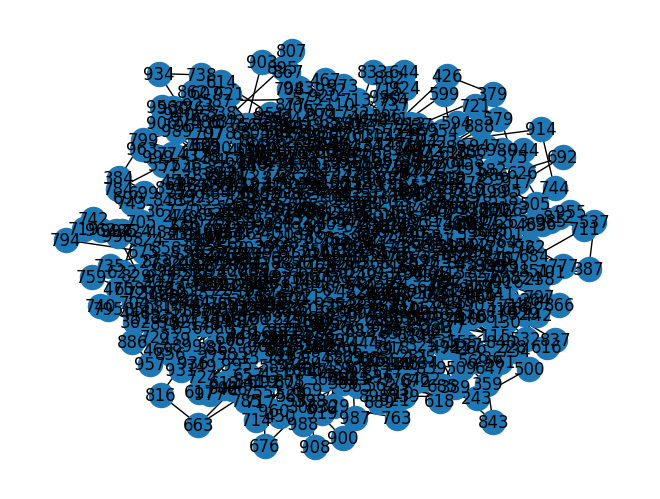

In [ ]:
#все 5 вершин соединены друг с другом
G_ba = nx.barabasi_albert_graph(1000, 2, initial_graph = nx.complete_graph(5))
nx.draw(G_ba, with_labels = True)
plt.show()

In [ ]:
# Начальное состояние
def initial_state(G_ba):
    state = {}
    for node in G_ba.nodes:
        state[node] = 'S'

    patient_zero = random.choice(list(G_ba.nodes))
    state[patient_zero] = 'I'
    R={}
    return state

In [ ]:
 initial_state(G_ba)



{0: 'S',
 1: 'S',
 2: 'S',
 3: 'S',
 4: 'S',
 5: 'S',
 6: 'S',
 7: 'S',
 8: 'S',
 9: 'S',
 10: 'S',
 11: 'S',
 12: 'S',
 13: 'S',
 14: 'S',
 15: 'S',
 16: 'S',
 17: 'S',
 18: 'S',
 19: 'S',
 20: 'S',
 21: 'S',
 22: 'S',
 23: 'S',
 24: 'S',
 25: 'S',
 26: 'S',
 27: 'S',
 28: 'S',
 29: 'S',
 30: 'S',
 31: 'S',
 32: 'S',
 33: 'S',
 34: 'S',
 35: 'S',
 36: 'S',
 37: 'S',
 38: 'S',
 39: 'S',
 40: 'S',
 41: 'S',
 42: 'S',
 43: 'S',
 44: 'S',
 45: 'S',
 46: 'S',
 47: 'S',
 48: 'S',
 49: 'S',
 50: 'S',
 51: 'S',
 52: 'S',
 53: 'S',
 54: 'S',
 55: 'S',
 56: 'S',
 57: 'S',
 58: 'S',
 59: 'S',
 60: 'S',
 61: 'S',
 62: 'S',
 63: 'S',
 64: 'S',
 65: 'S',
 66: 'S',
 67: 'S',
 68: 'S',
 69: 'S',
 70: 'S',
 71: 'S',
 72: 'S',
 73: 'S',
 74: 'S',
 75: 'S',
 76: 'S',
 77: 'S',
 78: 'S',
 79: 'S',
 80: 'S',
 81: 'S',
 82: 'S',
 83: 'S',
 84: 'S',
 85: 'S',
 86: 'S',
 87: 'S',
 88: 'S',
 89: 'S',
 90: 'S',
 91: 'S',
 92: 'S',
 93: 'S',
 94: 'S',
 95: 'S',
 96: 'S',
 97: 'S',
 98: 'S',
 99: 'S',
 100: 'S',

In [ ]:
def state_transition(G_ba, test_state, gamma, beta, R, max_iter=100):
    if max_iter == 0:#зацикливается
        return test_state

    new_state = test_state.copy()

    for node in G_ba:
        state = test_state[node]

        if state == 'I':
            if random.random() < gamma:
                new_state[node] = 'S'
        else:
            new_state[node] = 'R'

        for neighbor in G_ba[node]:
            neighbor_state = test_state[neighbor]

            if neighbor_state == 'I' and random.random() < beta:
                new_state[node] = 'I'
                break

    return state_transition(G_ba, new_state, gamma, beta, R, max_iter-1)
print(initial_statee)

test_state = initial_state(G_ba)
new_state = state_transition(G_ba, list(test_state.values()), gamma, beta, R)
new_state
gamma = 0.3
beta = 0.2
R = 0.01
test_state = initial_state(G_ba)
new_state = state_transition(G_ba, list(test_state.values()), gamma, beta, R)
new_state

{0: 'R', 1: 'R', 2: 'R', 3: 'R', 4: 'R', 5: 'R', 6: 'R', 7: 'R', 8: 'R', 9: 'R', 10: 'R', 11: 'R', 12: 'R', 13: 'R', 14: 'R', 15: 'R', 16: 'R', 17: 'R', 18: 'R', 19: 'R', 20: 'R', 21: 'R', 22: 'R', 23: 'R', 24: 'R', 25: 'R', 26: 'R', 27: 'R', 28: 'R', 29: 'R', 30: 'R', 31: 'R', 32: 'R', 33: 'R', 34: 'R', 35: 'R', 36: 'R', 37: 'R', 38: 'R', 39: 'R', 40: 'R', 41: 'R', 42: 'R', 43: 'R', 44: 'R', 45: 'R', 46: 'R', 47: 'R', 48: 'R', 49: 'R', 50: 'R', 51: 'R', 52: 'R', 53: 'R', 54: 'R', 55: 'R', 56: 'R', 57: 'R', 58: 'R', 59: 'R', 60: 'R', 61: 'R', 62: 'R', 63: 'R', 64: 'R', 65: 'R', 66: 'R', 67: 'R', 68: 'R', 69: 'R', 70: 'R', 71: 'R', 72: 'R', 73: 'R', 74: 'R', 75: 'R', 76: 'R', 77: 'R', 78: 'R', 79: 'R', 80: 'R', 81: 'R', 82: 'R', 83: 'R', 84: 'R', 85: 'R', 86: 'R', 87: 'R', 88: 'R', 89: 'R', 90: 'R', 91: 'R', 92: 'R', 93: 'R', 94: 'R', 95: 'R', 96: 'R', 97: 'R', 98: 'R', 99: 'R', 100: 'R', 101: 'R', 102: 'R', 103: 'R', 104: 'R', 105: 'R', 106: 'R', 107: 'R', 108: 'R', 109: 'R', 110: 'R',

['I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'S',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'S',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'S',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'S',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'R',
 'I',
 'I',
 'I',
 'S',
 'I',
 'I',
 'R',
 'I',
 'S',
 'I',
 'S',
 'I',
 'I',
 'I',
 'I',
 'S',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'R',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'R',
 'I',
 'R',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'R',
 'S',
 'I',
 'R',
 'I',
 'I',
 'I',
 'S',
 'I',
 'R',
 'S',
 'I',
 'I',
 'S',
 'I',
 'I',
 'I',
 'I'

In [ ]:
# запускаем симуляцию
from simulation import Simulation
sim = Simulation(G_ba, initial_state, state_transition, name='SIR model')

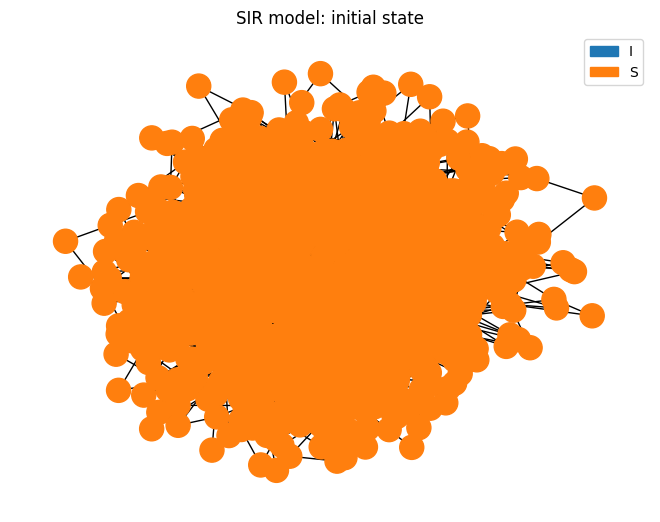

In [ ]:
sim.draw()

In [ ]:
gamma = 0.9
beta = 0.2
R = 0.9
initial_statee = initial_state(G_ba)
for node in G_ba:
    state = initial_statee [node]

    if state == 'I':
        if random.random() < gamma:
            initial_statee [node] = 'S'
    else:
        initial_statee [node] = 'R'

    for neighbor in G_ba[node]:
        neighbor_state = initial_statee [neighbor]

        if neighbor_state == 'I' and random.random() < beta:
            initial_statee [node] = 'I'
            break

print(initial_statee )

{0: 'R', 1: 'R', 2: 'R', 3: 'R', 4: 'R', 5: 'R', 6: 'R', 7: 'R', 8: 'R', 9: 'R', 10: 'R', 11: 'R', 12: 'R', 13: 'R', 14: 'R', 15: 'R', 16: 'R', 17: 'R', 18: 'R', 19: 'R', 20: 'R', 21: 'R', 22: 'R', 23: 'R', 24: 'R', 25: 'R', 26: 'R', 27: 'R', 28: 'R', 29: 'R', 30: 'R', 31: 'R', 32: 'R', 33: 'R', 34: 'R', 35: 'R', 36: 'R', 37: 'R', 38: 'R', 39: 'R', 40: 'R', 41: 'R', 42: 'R', 43: 'R', 44: 'R', 45: 'R', 46: 'R', 47: 'R', 48: 'R', 49: 'R', 50: 'R', 51: 'R', 52: 'R', 53: 'R', 54: 'R', 55: 'R', 56: 'R', 57: 'R', 58: 'R', 59: 'R', 60: 'R', 61: 'R', 62: 'R', 63: 'R', 64: 'R', 65: 'R', 66: 'R', 67: 'R', 68: 'R', 69: 'R', 70: 'R', 71: 'R', 72: 'R', 73: 'R', 74: 'R', 75: 'R', 76: 'R', 77: 'R', 78: 'R', 79: 'R', 80: 'R', 81: 'R', 82: 'R', 83: 'R', 84: 'R', 85: 'R', 86: 'R', 87: 'R', 88: 'R', 89: 'R', 90: 'R', 91: 'R', 92: 'R', 93: 'R', 94: 'R', 95: 'R', 96: 'R', 97: 'R', 98: 'R', 99: 'R', 100: 'R', 101: 'R', 102: 'R', 103: 'R', 104: 'R', 105: 'R', 106: 'R', 107: 'R', 108: 'R', 109: 'R', 110: 'R',

In [ ]:
def state_transition(G_ba, test_state, gamma, beta, R, max_iter=100):
    if max_iter == 0:
        return test_state

    new_state = test_state.copy()

    for node in G_ba:
        state = test_state[node]

        if state == 'I':
            if random.random() < gamma:
                new_state[node] = 'S'
        else:
            new_state[node] = 'R'

        for neighbor in G_ba[node]:
            neighbor_state = test_state[neighbor]

            if neighbor_state == 'I' and random.random() < beta:
                new_state[node] = 'I'
                break

    return state_transition(G_ba, new_state, gamma, beta, R, max_iter-1)
print(initial_statee)

test_state = initial_state(G_ba)
new_state = state_transition(G_ba, list(test_state.values()), gamma, beta, R)
new_state
gamma = 0.9
beta = 0.2
R = 0.9
test_state = initial_state(G_ba)
new_state = state_transition(G_ba, list(test_state.values()), gamma, beta, R)
new_state

{0: 'R', 1: 'R', 2: 'R', 3: 'R', 4: 'R', 5: 'R', 6: 'R', 7: 'R', 8: 'R', 9: 'R', 10: 'R', 11: 'R', 12: 'R', 13: 'R', 14: 'R', 15: 'R', 16: 'R', 17: 'R', 18: 'R', 19: 'R', 20: 'R', 21: 'R', 22: 'R', 23: 'R', 24: 'R', 25: 'R', 26: 'R', 27: 'R', 28: 'R', 29: 'R', 30: 'R', 31: 'R', 32: 'R', 33: 'R', 34: 'R', 35: 'R', 36: 'R', 37: 'R', 38: 'R', 39: 'R', 40: 'R', 41: 'R', 42: 'R', 43: 'R', 44: 'R', 45: 'R', 46: 'R', 47: 'R', 48: 'R', 49: 'R', 50: 'R', 51: 'R', 52: 'R', 53: 'R', 54: 'R', 55: 'R', 56: 'R', 57: 'R', 58: 'R', 59: 'R', 60: 'R', 61: 'R', 62: 'R', 63: 'R', 64: 'R', 65: 'R', 66: 'R', 67: 'R', 68: 'R', 69: 'R', 70: 'R', 71: 'R', 72: 'R', 73: 'R', 74: 'R', 75: 'R', 76: 'R', 77: 'R', 78: 'R', 79: 'R', 80: 'R', 81: 'R', 82: 'R', 83: 'R', 84: 'R', 85: 'R', 86: 'R', 87: 'R', 88: 'R', 89: 'R', 90: 'R', 91: 'R', 92: 'R', 93: 'R', 94: 'R', 95: 'R', 96: 'R', 97: 'R', 98: 'R', 99: 'R', 100: 'R', 101: 'R', 102: 'R', 103: 'R', 104: 'R', 105: 'R', 106: 'R', 107: 'R', 108: 'R', 109: 'R', 110: 'R',

['R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R'

**Подберите параметры модели так, чтобы эпидемия охватила весь граф (почти весь). Как меняются кривые заражения для узлов различной степени? Меняется ли скорость распространения эпидемии в зависимости от первоначально зараженных узлов?**

Чем больше изначально зараженных узлов, тем выше распространения эпидемии

# **II. Моделирование состояний**

Измените функцию state_transition так, чтобы можно было моделировать эпидемии по моделям SI и SIR.

Продемонстрируйте работу на модели графа карате клуба.

Как быстро эпидемия охватит весь граф в модели SI? Вычислите среднее время, необходимое для заражения всех узлов в графе на основе 100 симуляций алгоритма. В начальный момент заражен один узел. Постройте зависимость времени заражения от параметра модели.

In [23]:
G = nx.karate_club_graph()

In [24]:
# Начальное состояние
def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'S'

    patient_zero = random.choice(list(G.nodes))
    state[patient_zero] = 'I'
    R={}
    return state

In [25]:
initial_state(G)

{0: 'S',
 1: 'S',
 2: 'S',
 3: 'S',
 4: 'S',
 5: 'S',
 6: 'S',
 7: 'S',
 8: 'S',
 9: 'S',
 10: 'S',
 11: 'S',
 12: 'S',
 13: 'S',
 14: 'S',
 15: 'S',
 16: 'S',
 17: 'S',
 18: 'S',
 19: 'S',
 20: 'S',
 21: 'I',
 22: 'S',
 23: 'S',
 24: 'S',
 25: 'S',
 26: 'S',
 27: 'S',
 28: 'S',
 29: 'S',
 30: 'S',
 31: 'S',
 32: 'S',
 33: 'S'}

In [12]:
gamma = 0.1
beta = 0.1

# описываем переход между состояниями
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'I':
            if random.random() < gamma:
                next_state[node] = 'S'
    return next_state


In [20]:
test_state = initial_state(G)
new_state = state_transition(G, test_state)
new_state

{}

In [21]:
# запускаем симуляцию
from simulation import Simulation
sim = Simulation(G, initial_state, state_transition, name='SI model')

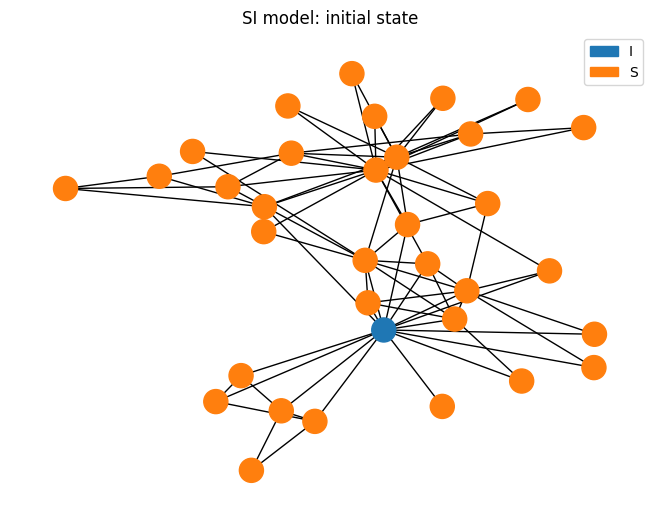

In [22]:
sim.draw()

In [30]:
def state_transition(G, test_state, gamma, beta, R, max_iter=100):
    if max_iter == 0:
        return test_state

    new_state = test_state.copy()

    for node in G:
        state = test_state[node]

        if state == 'I':
            if random.random() < gamma:
                new_state[node] = 'S'
        else:
            new_state[node] = 'R'

        for neighbor in G[node]:
            neighbor_state = test_state[neighbor]

            if neighbor_state == 'I' and random.random() < beta:
                new_state[node] = 'I'
                break

    return state_transition(G, new_state, gamma, beta, R, max_iter-1)
print(initial_statee)

gamma = 0.3
beta = 0.2
R = 0.01
test_state = initial_state(G)
new_state = state_transition(G, list(test_state.values()), gamma, beta, R)
new_state

{0: 'I', 1: 'R', 2: 'I', 3: 'I', 4: 'R', 5: 'R', 6: 'R', 7: 'I', 8: 'I', 9: 'R', 10: 'R', 11: 'I', 12: 'R', 13: 'I', 14: 'R', 15: 'R', 16: 'R', 17: 'R', 18: 'R', 19: 'R', 20: 'R', 21: 'I', 22: 'R', 23: 'R', 24: 'R', 25: 'R', 26: 'R', 27: 'R', 28: 'R', 29: 'R', 30: 'R', 31: 'R', 32: 'R', 33: 'I'}


['I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'R',
 'I',
 'S',
 'R',
 'I',
 'R',
 'I',
 'I',
 'R',
 'I',
 'R',
 'S',
 'R',
 'I',
 'I',
 'S',
 'R',
 'I',
 'I',
 'I',
 'I',
 'S',
 'R',
 'S',
 'S',
 'I',
 'I',
 'I']

In [32]:
# запускаем симуляцию
from simulation import Simulation
sim = Simulation(G, initial_state, state_transition, name='SIR model')

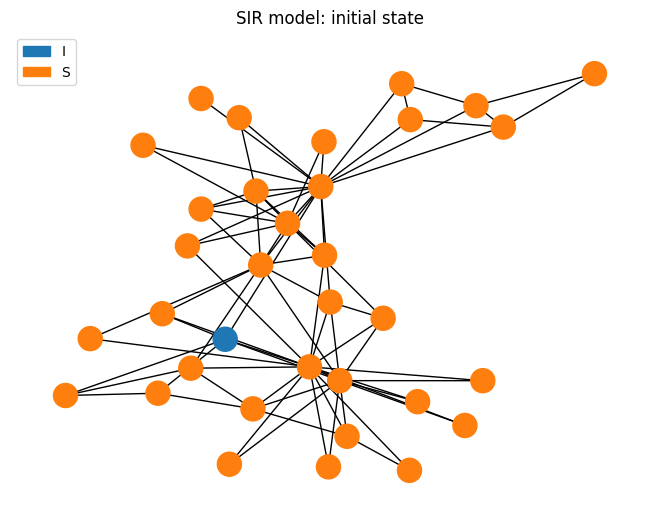

In [33]:
sim.draw()

In [35]:
# Численность популяции, N.
N = 36
# Число зараженных, I0
I0 = 1
# Число восприимчивых
S0 = N - I0
# Параметр инфекции
beta = 0.1
# Временное интервал (в днях)
t = np.linspace(0,100)

In [36]:
# Система дифференциальных уравнений SI модель
def deriv(y, t, N, beta):
    S, I = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N
    return dSdt, dIdt

In [39]:
# Начальные условия
y0 = S0, I0
# Решаем систему
ret = odeint(deriv, y0, t, args=(N, beta))
S, I = ret.T

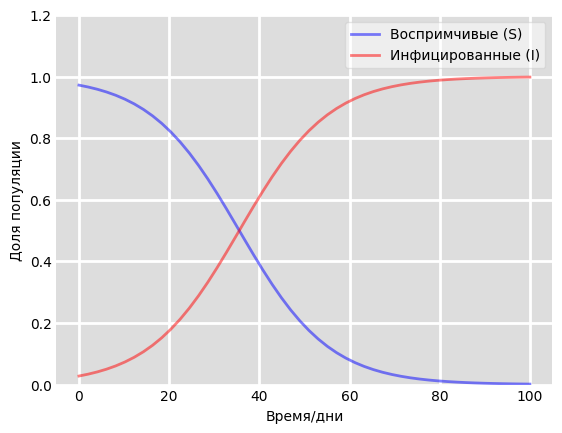

In [40]:
# Рисуем картинку S(t) и I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Воспримчивые (S)')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Инфицированные (I)')
ax.set_xlabel('Время/дни')
ax.set_ylabel('Доля популяции')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()